# IEEE-CIS fraud detection 

## 데이터 불러오기 

In [2]:
#불러오기 
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor


** featuring engineering ! **

1. train/test 합쳐서 전처리 및 feature engineering 진행 필요 

2. test data 합치기 전에 target 분리 

```python
features = train_transaction.iloc[:, 2:]
target = train_transaction.iloc[:, 1]
```


In [3]:
train_identity = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/train_identity.csv')
test_identity = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_identity.csv')
train_transaction = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/train_transaction.csv')
test_transaction = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_transaction.csv')


test_identity.head()

TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  id-08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
4        3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   

   id-09  ...                    id-31  id-32     id-33           id-34  \
0    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   
1    0.0  ...  chrome 67.0 for android   24.0  1280x720  match_status:2   
2    NaN  ...       ie 11.0 for tablet    NaN       NaN             NaN   
3    0.0  ...  chrome 67.0 for android    NaN       NaN             NaN   
4    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   

   id-35 id-36 id-37  id-38  DeviceType                   DeviceInfo  
0      F     F     T      F      mobile  MYA-L13 Build/HUAWEIMYA-L13  
1      T     F     T      T      mobile         LGLS676 Build/MXB48T  
2      F     T     T      F     desktop                  Trident/7.0  
3      F     F     T      F      mobile  MYA-L13 Build/HUAWEIMYA-L13  
4      F     F     T      F      mobile         SM-G9650 Build/R16NW  

[5 rows x 41 columns]

In [3]:
train_transaction.iloc[:, 0].name

'TransactionID'

<AxesSubplot:xlabel='isFraud'>

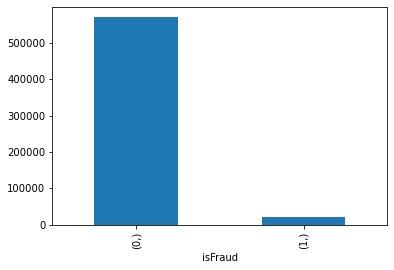

In [4]:
# is fraud 의 비율 : 3.6%
ax = train_transaction[['isFraud']].value_counts()
ax.plot.bar()

In [5]:
pd.set_option('display.max_columns', None)
train_identity.head(5).sort_values('TransactionID')

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  \
0    NaN    NaN  100.0  NotFound    NaN -480.0    New  NotFound  166.0    NaN   
1    NaN    NaN  100.0  NotFound   49.0 -300.0    New  NotFound  166.0    NaN   
2    0.0    0.0  100.0  NotFound   52.0    NaN  Found     Found  121.0    NaN   
3    NaN    NaN  100.0  NotFound   52.0    NaN    New  NotFound  225.0    NaN   
4    0.0    0.0  100.0  NotFound    NaN -300.0  Found     Found  166.0   15.0   

   id_19  id_20  id_21  id_22 id_23  id_24  id_25  id_26 id_27  id_28  \
0  542.0  144.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
1  621.0  500.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
2  410.0  142.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   
3  176.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
4  529.0  575.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   

      id_29             id_30                id_31  id_32      id_33  \
0  NotFound       Android 7.0  samsung browser 6.2   32.0  2220x1080   
1  NotFound        iOS 11.1.2   mobile safari 11.0   32.0   1334x750   
2     Found               NaN          chrome 62.0    NaN        NaN   
3  NotFound               NaN          chrome 62.0    NaN        NaN   
4     Found  Mac OS X 10_11_6          chrome 62.0   24.0   1280x800   

            id_34 id_35 id_36 id_37 id_38 DeviceType  \
0  match_status:2     T     F     T     T     mobile   
1  match_status:1     T     F     F     T     mobile   
2             NaN     F     F     T     T    desktop   
3             NaN     F     F     T     T    desktop   
4  match_status:2     T     F     T     T    desktop   

                      DeviceInfo  
0  SAMSUNG SM-G892A Build/NRD90M  
1                     iOS Device  
2                        Windows  
3                            NaN  
4                          MacOS

In [19]:
train_transaction.iloc[:,10:30]

card6  addr1  addr2  dist1  dist2 P_emaildomain R_emaildomain   C1  \
0       credit  315.0   87.0   19.0    NaN           NaN           NaN  1.0   
1       credit  325.0   87.0    NaN    NaN     gmail.com           NaN  1.0   
2        debit  330.0   87.0  287.0    NaN   outlook.com           NaN  1.0   
3        debit  476.0   87.0    NaN    NaN     yahoo.com           NaN  2.0   
4       credit  420.0   87.0    NaN    NaN     gmail.com           NaN  1.0   
...        ...    ...    ...    ...    ...           ...           ...  ...   
590535   debit  272.0   87.0   48.0    NaN           NaN           NaN  2.0   
590536   debit  204.0   87.0    NaN    NaN     gmail.com           NaN  1.0   
590537   debit  231.0   87.0    NaN    NaN     gmail.com           NaN  1.0   
590538   debit  387.0   87.0    3.0    NaN       aol.com           NaN  1.0   
590539  credit  299.0   87.0    NaN    NaN     gmail.com           NaN  2.0   

         C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  
0       1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  
1       1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  
2       1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  
3       5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  
4       1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
590535  1.0  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  1.0  0.0   3.0  
590536  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  
590537  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  
590538  1.0  0.0  0.0  0.0  3.0  0.0  0.0  2.0  0.0  1.0  1.0   5.0  
590539  1.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  1.0  0.0   1.0  

[590540 rows x 20 columns]

In [15]:
train_transaction.P_emaildomain.describe()

count        496084
unique           59
top       gmail.com
freq         228355
Name: P_emaildomain, dtype: object

In [16]:
train_transaction.R_emaildomain.describe()

count        137291
unique           60
top       gmail.com
freq          57147
Name: R_emaildomain, dtype: object

In [24]:
train_identity.iloc[:,:50].describe()

TransactionID          id_01          id_02         id_03  \
count   1.442330e+05  144233.000000  140872.000000  66324.000000   
mean    3.236329e+06     -10.170502  174716.584708      0.060189   
std     1.788496e+05      14.347949  159651.816856      0.598231   
min     2.987004e+06    -100.000000       1.000000    -13.000000   
25%     3.077142e+06     -10.000000   67992.000000      0.000000   
50%     3.198818e+06      -5.000000  125800.500000      0.000000   
75%     3.392923e+06      -5.000000  228749.000000      0.000000   
max     3.577534e+06       0.000000  999595.000000     10.000000   

              id_04          id_05          id_06        id_07        id_08  \
count  66324.000000  136865.000000  136865.000000  5155.000000  5155.000000   
mean      -0.058938       1.615585      -6.698710    13.285354   -38.600388   
std        0.701015       5.249856      16.491104    11.384207    26.084899   
min      -28.000000     -72.000000    -100.000000   -46.000000  -100.000000   
25%        0.000000       0.000000      -6.000000     5.000000   -48.000000   
50%        0.000000       0.000000       0.000000    14.000000   -34.000000   
75%        0.000000       1.000000       0.000000    22.000000   -23.000000   
max        0.000000      52.000000       0.000000    61.000000     0.000000   

              id_09  ...          id_17         id_18          id_19  \
count  74926.000000  ...  139369.000000  45113.000000  139318.000000   
mean       0.091023  ...     189.451377     14.237337     353.128174   
std        0.983842  ...      30.375360      1.561302     141.095343   
min      -36.000000  ...     100.000000     10.000000     100.000000   
25%        0.000000  ...     166.000000     13.000000     266.000000   
50%        0.000000  ...     166.000000     15.000000     341.000000   
75%        0.000000  ...     225.000000     15.000000     427.000000   
max       25.000000  ...     229.000000     29.000000     671.000000   

               id_20        id_21        id_22        id_24        id_25  \
count  139261.000000  5159.000000  5169.000000  4747.000000  5132.000000   
mean      403.882666   368.269820    16.002708    12.800927   329.608924   
std       152.160327   198.847038     6.897665     2.372447    97.461089   
min       100.000000   100.000000    10.000000    11.000000   100.000000   
25%       256.000000   252.000000    14.000000    11.000000   321.000000   
50%       472.000000   252.000000    14.000000    11.000000   321.000000   
75%       533.000000   486.500000    14.000000    15.000000   371.000000   
max       661.000000   854.000000    44.000000    26.000000   548.000000   

             id_26         id_32  
count  5163.000000  77586.000000  
mean    149.070308     26.508597  
std      32.101995      3.737502  
min     100.000000      0.000000  
25%     119.000000     24.000000  
50%     149.000000     24.000000  
75%     169.000000     32.000000  
max     216.000000     32.000000  

[8 rows x 24 columns]

In [39]:
idnu_under100 = []
idnu_over100 = []
for i in range(33):
    a = train_identity.iloc[:,i]
    if a.nunique() < 100:
        idnu_over100.append(a.name)
    else:
        idnu_under100.append(a.name)
print(idnu_over100)
print(idnu_under100)

['id_01', 'id_03', 'id_04', 'id_05', 'id_07', 'id_08', 'id_09', 'id_10', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_18', 'id_22', 'id_23', 'id_24', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_32']
['TransactionID', 'id_02', 'id_06', 'id_11', 'id_17', 'id_19', 'id_20', 'id_21', 'id_25', 'id_31']


In [50]:
print(train_identity[idnu_over100].nunique())
train_identity[idnu_over100].describe(include = "O")

id_01    77
id_03    24
id_04    15
id_05    93
id_07    84
id_08    94
id_09    46
id_10    62
id_12     2
id_13    54
id_14    25
id_15     3
id_16     2
id_18    18
id_22    25
id_23     3
id_24    12
id_26    95
id_27     2
id_28     2
id_29     2
id_30    75
id_32     4
dtype: int64


id_12   id_15   id_16                 id_23  id_27   id_28   id_29  \
count     144233  140985  129340                  5169   5169  140978  140978   
unique         2       3       2                     3      2       2       2   
top     NotFound   Found   Found  IP_PROXY:TRANSPARENT  Found   Found   Found   
freq      123025   67728   66324                  3489   5155   76232   74926   

             id_30  
count        77565  
unique          75  
top     Windows 10  
freq         21155

In [43]:
print(train_identity[idnu_under100].nunique())
train_identity[idnu_under100].describe()

TransactionID    144233
id_02            115655
id_06               101
id_11               365
id_17               104
id_19               522
id_20               394
id_21               490
id_25               341
id_31               130
dtype: int64


TransactionID          id_02          id_06          id_11  \
count   1.442330e+05  140872.000000  136865.000000  140978.000000   
mean    3.236329e+06  174716.584708      -6.698710      99.745325   
std     1.788496e+05  159651.816856      16.491104       1.127602   
min     2.987004e+06       1.000000    -100.000000      90.000000   
25%     3.077142e+06   67992.000000      -6.000000     100.000000   
50%     3.198818e+06  125800.500000       0.000000     100.000000   
75%     3.392923e+06  228749.000000       0.000000     100.000000   
max     3.577534e+06  999595.000000       0.000000     100.000000   

               id_17          id_19          id_20        id_21        id_25  
count  139369.000000  139318.000000  139261.000000  5159.000000  5132.000000  
mean      189.451377     353.128174     403.882666   368.269820   329.608924  
std        30.375360     141.095343     152.160327   198.847038    97.461089  
min       100.000000     100.000000     100.000000   100.000000   100.000000  
25%       166.000000     266.000000     256.000000   252.000000   321.000000  
50%       166.000000     341.000000     472.000000   252.000000   321.000000  
75%       225.000000     427.000000     533.000000   486.500000   371.000000  
max       229.000000     671.000000     661.000000   854.000000   548.000000

In [78]:
idnu_over100 =['id_02', 'id_06', 'id_11', 'id_17', 'id_19', 'id_20', 'id_21', 'id_25', 'id_31']
train_identity[idnu_over100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id_02   140872 non-null  float64
 1   id_06   136865 non-null  float64
 2   id_11   140978 non-null  float64
 3   id_17   139369 non-null  float64
 4   id_19   139318 non-null  float64
 5   id_20   139261 non-null  float64
 6   id_21   5159 non-null    float64
 7   id_25   5132 non-null    float64
 8   id_31   140282 non-null  object 
dtypes: float64(8), object(1)
memory usage: 9.9+ MB


In [48]:
train_identity['id_03']

0         NaN
1         NaN
2         0.0
3         NaN
4         0.0
         ... 
144228    0.0
144229    NaN
144230    NaN
144231    0.0
144232    NaN
Name: id_03, Length: 144233, dtype: float64

### Transaction table Column 선정

#### C-columns

In [7]:
train_transaction[[f'C{i}' for i in range(1,15) ]].nunique()

C1     1657
C2     1216
C3       27
C4     1260
C5      319
C6     1328
C7     1103
C8     1253
C9      205
C10    1231
C11    1476
C12    1199
C13    1597
C14    1108
dtype: int64

In [8]:
sorted(train_transaction['C3'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0]

C value 컬럼 특징
- 결측치 없음
- C3 의 nunique : 27 ( 0 ~ 26)
- 

In [9]:
#Alphabet - value 들간 상관계수 확인 
c_column_df = train_transaction[[f'C{i}' for i in range(1,15) ]]
C_corr = c_column_df.corr()
C_corr

C1        C2        C3        C4        C5        C6        C7  \
C1   1.000000  0.995089 -0.003467  0.967800  0.165862  0.982238  0.926258   
C2   0.995089  1.000000 -0.003339  0.972134  0.126540  0.974845  0.938867   
C3  -0.003467 -0.003339  1.000000 -0.001720 -0.008101 -0.004711 -0.001730   
C4   0.967800  0.972134 -0.001720  1.000000 -0.012842  0.962319  0.895092   
C5   0.165862  0.126540 -0.008101 -0.012842  1.000000  0.232409 -0.009970   
C6   0.982238  0.974845 -0.004711  0.962319  0.232409  1.000000  0.858583   
C7   0.926258  0.938867 -0.001730  0.895092 -0.009970  0.858583  1.000000   
C8   0.967746  0.975863 -0.001203  0.959995 -0.011654  0.921972  0.982983   
C9   0.175999  0.133566 -0.010074 -0.015970  0.925786  0.250695 -0.012399   
C10  0.958202  0.970624 -0.001494  0.952466 -0.011846  0.914440  0.985062   
C11  0.996515  0.993898 -0.003583  0.974547  0.168862  0.991105  0.915209   
C12  0.927939  0.940258 -0.001763  0.894619 -0.009875  0.858182  0.999489   
C13  0.774603  0.751221 -0.007747  0.644549  0.717509  0.808531  0.632394   
C14  0.951761  0.936148 -0.005091  0.907676  0.378950  0.984201  0.794701   

           C8        C9       C10       C11       C12       C13       C14  
C1   0.967746  0.175999  0.958202  0.996515  0.927939  0.774603  0.951761  
C2   0.975863  0.133566  0.970624  0.993898  0.940258  0.751221  0.936148  
C3  -0.001203 -0.010074 -0.001494 -0.003583 -0.001763 -0.007747 -0.005091  
C4   0.959995 -0.015970  0.952466  0.974547  0.894619  0.644549  0.907676  
C5  -0.011654  0.925786 -0.011846  0.168862 -0.009875  0.717509  0.378950  
C6   0.921972  0.250695  0.914440  0.991105  0.858182  0.808531  0.984201  
C7   0.982983 -0.012399  0.985062  0.915209  0.999489  0.632394  0.794701  
C8   1.000000 -0.014492  0.996970  0.962722  0.983027  0.653245  0.860246  
C9  -0.014492  1.000000 -0.014731  0.182446 -0.012212  0.704056  0.397396  
C10  0.996970 -0.014731  1.000000  0.956056  0.983817  0.653941  0.853009  
C11  0.962722  0.182446  0.956056  1.000000  0.915693  0.779286  0.962465  
C12  0.983027 -0.012212  0.983817  0.915693  1.000000  0.631704  0.793936  
C13  0.653245  0.704056  0.653941  0.779286  0.631704  1.000000  0.880722  
C14  0.860246  0.397396  0.853009  0.962465  0.793936  0.880722  1.000000

In [10]:
sns.heatmap(C_corr)

<AxesSubplot:>

In [11]:
c_column_df.describe()

C1             C2             C3             C4  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean       14.092458      15.269734       0.005644       4.092185   
std       133.569018     154.668899       0.150536      68.848459   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         3.000000       3.000000       0.000000       0.000000   
max      4685.000000    5691.000000      26.000000    2253.000000   

                  C5             C6             C7             C8  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        5.571526       9.071082       2.848478       5.144574   
std        25.786976      71.508467      61.727304      95.378574   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         1.000000       2.000000       0.000000       0.000000   
max       349.000000    2253.000000    2255.000000    3331.000000   

                  C9            C10            C11            C12  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        4.480240       5.240343      10.241521       4.076227   
std        16.674897      95.581443      94.336292      86.666218   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         2.000000       0.000000       2.000000       0.000000   
max       210.000000    3257.000000    3188.000000    3188.000000   

                 C13            C14  
count  590540.000000  590540.000000  
mean       32.539918       8.295215  
std       129.364844      49.544262  
min         0.000000       0.000000  
25%         1.000000       1.000000  
50%         3.000000       1.000000  
75%        12.000000       2.000000  
max      2918.000000    1429.000000

points - 
평균, 4분위수들은 엄청 작은데 max 값은 엄청 큼.. 이상치는 아닐까? 

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


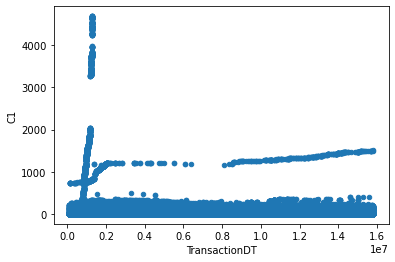

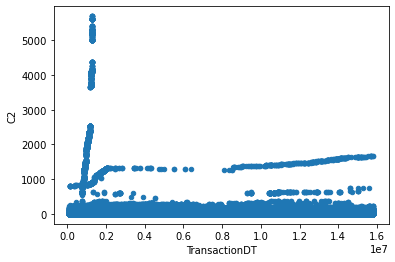

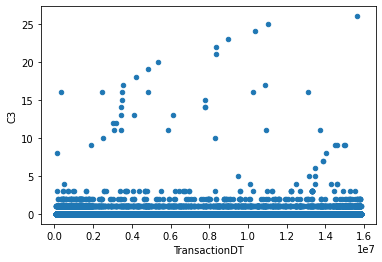

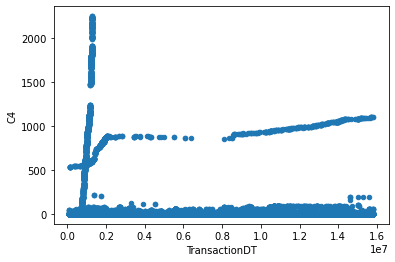

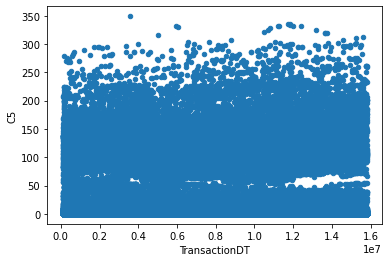

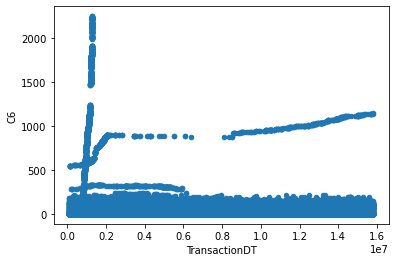

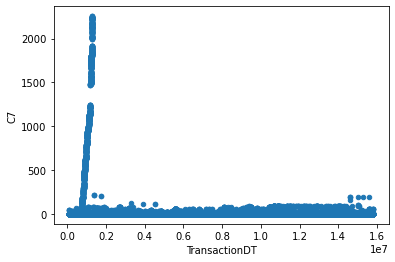

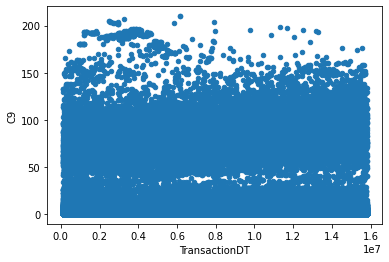

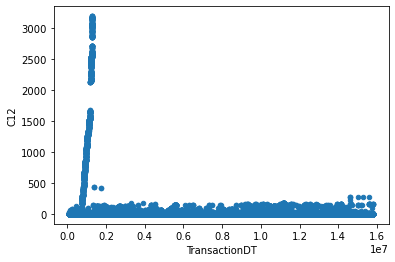

In [12]:
#컬럼 별 분포 확인
for i in range(1, 15):
    figures = train_transaction.plot( 'TransactionDT', f'C{i}',"scatter")
    
    print(figures)

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


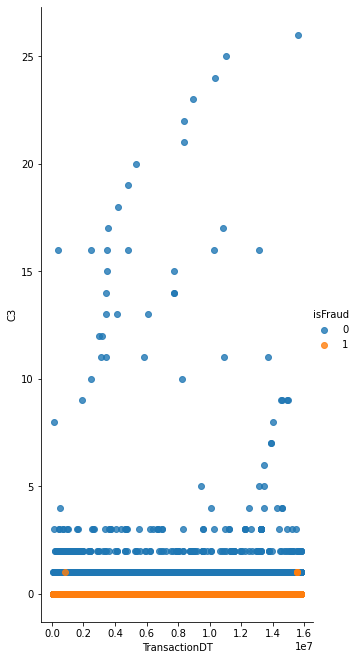

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


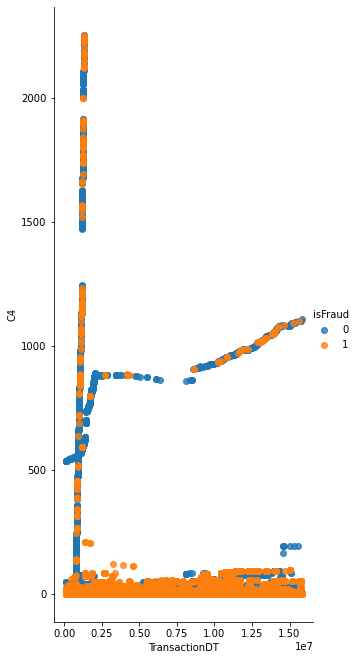

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


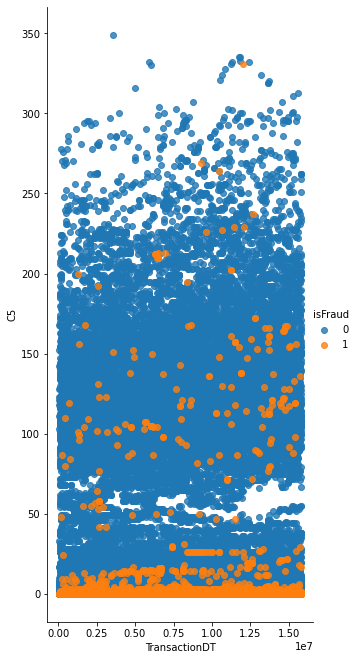

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


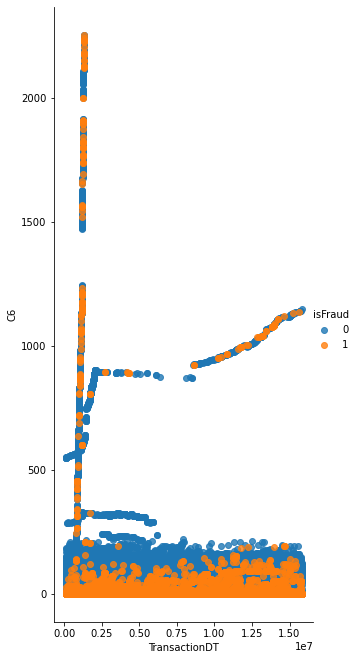

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


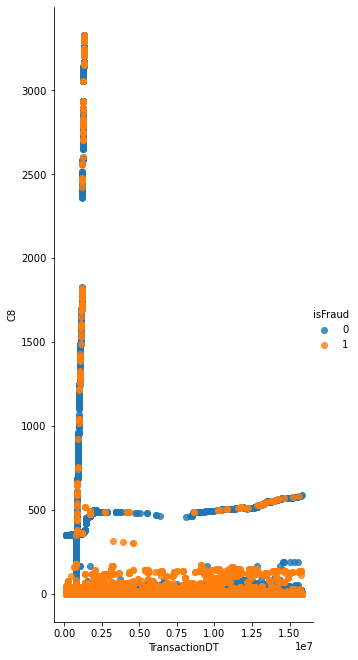

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


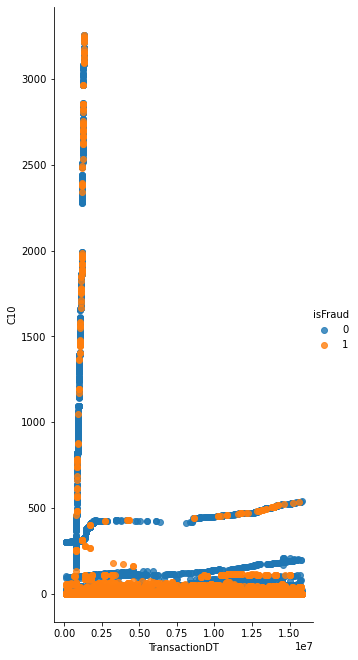

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


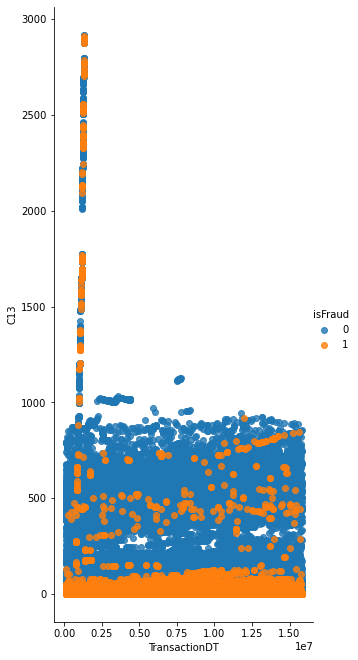

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


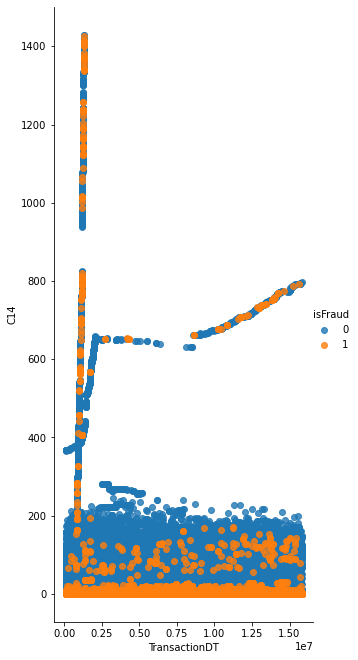

In [13]:
#graph trial - 결제 시각 & C-columns, 
for i in range(1, 15):
    sns.lmplot('TransactionDT', f'C{i}', train_transaction, hue='isFraud', fit_reg=False)
    fig = plt.gcf()
    fig.set_size_inches(5, 10)
    plt.show()

In [14]:
#graph trial - card colum & C-columns ?? 
card4_encoding = pd.get_dummies(train_transaction, columns = ['card4'])
card4_encoding

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3  card5   card6  addr1  addr2  dist1  dist2  \
0       13926    NaN  150.0  142.0  credit  315.0   87.0   19.0    NaN   
1        2755  404.0  150.0  102.0  credit  325.0   87.0    NaN    NaN   
2        4663  490.0  150.0  166.0   debit  330.0   87.0  287.0    NaN   
3       18132  567.0  150.0  117.0   debit  476.0   87.0    NaN    NaN   
4        4497  514.0  150.0  102.0  credit  420.0   87.0    NaN    NaN   
...       ...    ...    ...    ...     ...    ...    ...    ...    ...   
590535   6550    NaN  150.0  226.0   debit  272.0   87.0   48.0    NaN   
590536  10444  225.0  150.0  224.0   debit  204.0   87.0    NaN    NaN   
590537  12037  595.0  150.0  224.0   debit  231.0   87.0    NaN    NaN   
590538   7826  481.0  150.0  224.0   debit  387.0   87.0    3.0    NaN   
590539  15066  170.0  150.0  102.0  credit  299.0   87.0    NaN    NaN   

       P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8  \
0                NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
1          gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
2        outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
3          yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0   
4          gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0   
...              ...           ...  ...  ...  ...  ...  ...  ...  ...  ...   
590535           NaN           NaN  2.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
590536     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
590537     gmail.com           NaN  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
590538       aol.com           NaN  1.0  1.0  0.0  0.0  0.0  3.0  0.0  0.0   
590539     gmail.com           NaN  2.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   

         C9  C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  \
0       1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN   
1       0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN   
2       1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN   
3       1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN   
4       0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN   
...     ...  ...  ...  ...   ...  ...    ...    ...   ...   ...  ...  ..  ..   
590535  2.0  0.0  1.0  0.0   3.0  2.0   29.0   29.0  30.0   NaN  NaN NaN NaN   
590536  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN   
590537  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN   
590538  2.0  0.0  1.0  1.0   5.0  1.0   22.0   22.0   0.0  22.0  0.0 NaN NaN   
590539  2.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   0.0   1.0  0.0 NaN NaN   

        D8  D9   D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5  \
0      NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F   
1      NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T   
2      NaN NaN   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F   
3      N

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

<Figure size 432x288 with 0 Axes>

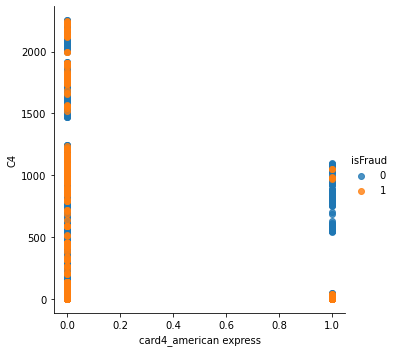

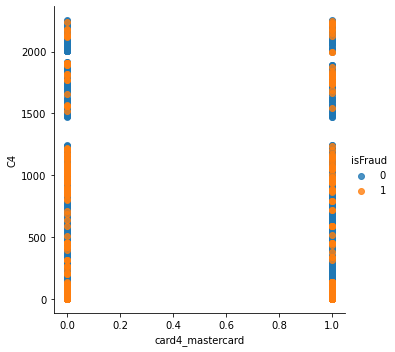

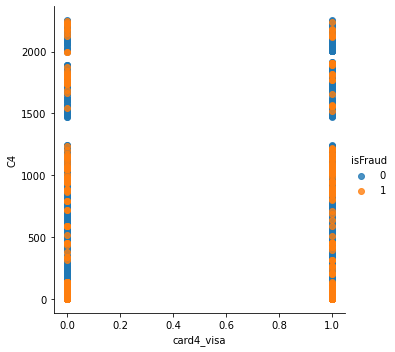

In [15]:
plt.figure()

sns.lmplot('card4_american express', 'C4', card4_encoding, hue='isFraud', fit_reg=False)
sns.lmplot('card4_discover', 'C4', card4_encoding, hue='isFraud', fit_reg=False)
sns.lmplot('card4_mastercard', 'C4', card4_encoding, hue='isFraud', fit_reg=False)
sns.lmplot('card4_visa', 'C4', card4_encoding, hue='isFraud', fit_reg=False)

fig.set_size_inches(5, 10)
plt.show()

In [16]:
#VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_table = pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(c_column_df.values, idx) for idx in range(c_column_df.shape[1])],
    "features": c_column_df.columns,
})
VIF_table= VIF_table.sort_values('VIF Factor', ascending = False)
VIF_table

VIF Factor features
11  4195.722689      C12
6   2953.148577       C7
10  2313.900499      C11
7   1614.232379       C8
3    856.079141       C4
5    650.245064       C6
9    530.471117      C10
0    513.258502       C1
13   368.179637      C14
1    347.255671       C2
8     69.359449       C9
12    41.240021      C13
4     15.059040       C5
2      1.000764       C3

##### discussion of this block
사용할 feature / reason
- C2, C5, C13 : VIF 가 가장 낮은 하위 3개 column 
- C3, C5, C9 : TransactionDT, TransactionAmt 분포에서 isFraud 0 과 1 데이터의 분포가 다름 (그래프 참고)

2, 3, 5, 9, 13

In [17]:
list(VIF_table.index)

[11, 6, 10, 7, 3, 5, 9, 0, 13, 1, 8, 12, 4, 2]

In [18]:
#다중공선성 상위 컬럼 제거 
VIF_list= list(VIF_table.index+1)
c_column_df_2 = c_column_df.copy()
for i in (VIF_list[0:10]):
    c_column_df_try = c_column_df_2.drop(columns = f'C{i}')
    print(f'VIF without C{i} column')
    print('---------------')
    print(pd.DataFrame({
        "VIF Factor": [variance_inflation_factor(c_column_df_try.values, idx) for idx in range(c_column_df_try.shape[1])],
        "features": c_column_df_try.columns,
    }))
    c_column_df_2 = c_column_df_try
    print('---------------')

VIF without C12 column
---------------
     VIF Factor features
0    510.640419       C1
1    312.304149       C2
2      1.000599       C3
3    666.886306       C4
4     15.051982       C5
5    536.338087       C6
6    392.492650       C7
7   1387.978424       C8
8     65.161266       C9
9    497.780420      C10
10  1717.746324      C11
11    40.025995      C13
12   347.443902      C14
---------------
VIF without C7 column
---------------
     VIF Factor features
0    509.856229       C1
1    298.417673       C2
2      1.000377       C3
3    545.864800       C4
4     14.977470       C5
5    535.819676       C6
6    853.056811       C8
7     64.907933       C9
8    447.181814      C10
9   1711.823898      C11
10    39.712340      C13
11   346.284820      C14
---------------
VIF without C11 column
---------------
    VIF Factor features
0   488.113302       C1
1   245.034117       C2
2     1.000375       C3
3   526.965544       C4
4    14.883448       C5
5   379.357659       C6
6   748.8

C column selection based on VIF


|index|VIF Factor|features|   
|---|---|---|     
|0|13.191786|C2|   
|1|1.000056|C3|   
|2|12.684590|C5|   
|3|8.651003|C9|   
|4|28.550909|C13|   

or

|index|VIF Factor|features|   
|---|---|---|     
|0|1.000006|C3|
|1|7.701714|C5|
|2|7.491669|C9|
|3|2.216787|C13|

In [19]:
c_column_df_2[['isFraud']] = train_transaction[['isFraud']]

c_column_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   C3       590540 non-null  float64
 1   C5       590540 non-null  float64
 2   C9       590540 non-null  float64
 3   C13      590540 non-null  float64
 4   isFraud  590540 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 22.5 MB


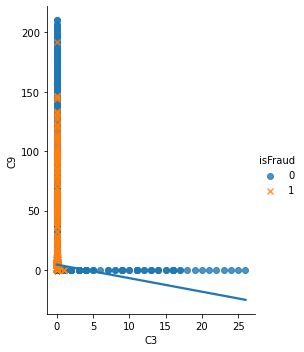

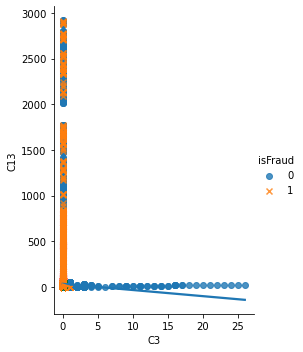

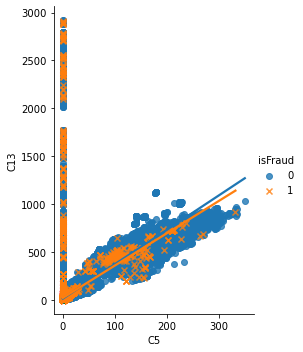

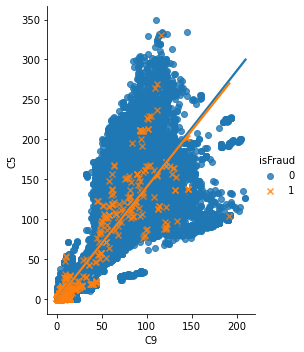

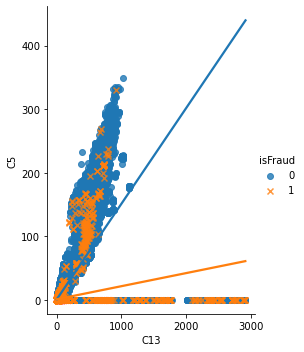

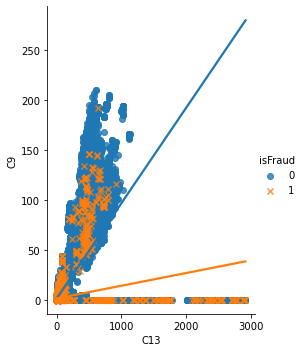

In [20]:
#scatter? 
for i in [3,5,9,13]:
    for j in [5,9,13]:
        if i == j :
            pass
        else: 
            g = sns.lmplot(x=f"C{i}", y=f"C{j}", aspect=0.75,
                hue="isFraud", markers=["o", "x"], ci=None, data=c_column_df_2)

            plt.show()

In [21]:
#PCA 함수
def apply_PCA(X, n_components, show_plot):
    from sklearn.decomposition import PCA
    # training data와 test data를 모두 PCA를 이용하여 차원 감소를 수행합니다.
    pca = PCA(n_components=n_components) # 원래 데이터의 90%를 보존하는 차원.
    pca_090 = pca.fit(X) # 학습 및 변환
    reduced_X = pca_090.transform(X)
    print("explained variance ratio:", pca.explained_variance_ratio_)
    print("shape:", reduced_X.shape)

    if show_plot:
        labels = [f"PC{x}" for x in range(1, reduced_X.shape[1]+1)]
        pca_090_variance = np.round(pca_090.explained_variance_ratio_.cumsum()*100, decimals=1)
        plt.figure(figsize=(25,5))
        plt.bar(x=range(1, len(pca_090_variance)+1), height=pca_090_variance, tick_label=labels)

        plt.xticks(rotation=90, color='indigo', size=15)
        plt.yticks(rotation=0, color='indigo', size=15)
        plt.title('Scree Plot',color='tab:orange', fontsize=25)
        plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
        plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
        plt.show()
        
    pca_df = pd.DataFrame(reduced_X, columns=labels)
    print('pca_df')
    display(pca_df)

    return pca_df

In [22]:
#scaling
c_column_df.describe()

C1             C2             C3             C4  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean       14.092458      15.269734       0.005644       4.092185   
std       133.569018     154.668899       0.150536      68.848459   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         3.000000       3.000000       0.000000       0.000000   
max      4685.000000    5691.000000      26.000000    2253.000000   

                  C5             C6             C7             C8  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        5.571526       9.071082       2.848478       5.144574   
std        25.786976      71.508467      61.727304      95.378574   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         1.000000       2.000000       0.000000       0.000000   
max       349.000000    2253.000000    2255.000000    3331.000000   

                  C9            C10            C11            C12  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        4.480240       5.240343      10.241521       4.076227   
std        16.674897      95.581443      94.336292      86.666218   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         2.000000       0.000000       2.000000       0.000000   
max       210.000000    3257.000000    3188.000000    3188.000000   

                 C13            C14  
count  590540.000000  590540.000000  
mean       32.539918       8.295215  
std       129.364844      49.544262  
min         0.000000       0.000000  
25%         1.000000       1.000000  
50%         3.000000       1.000000  
75%        12.000000       2.000000  
max      2918.000000    1429.000000

In [23]:
apply_PCA(c_column_df, True)

TypeError: apply_PCA() missing 1 required positional argument: 'show_plot'

#### 전처리 1 

In [24]:
#test/ train data 한번에 처리 필요

total = pd.concat([train_transaction, test_transaction]) 
split_point = len(train_transaction)

#drop
tempX = total.drop(columns=['C1', 'C2','C4','C6',  'C7',  'C8','C10', 'C11', 'C12', 'C14'])
tr_trans_pp = tempX[:split_point]
test_trans_pp = tempX[split_point:]
print(tr_trans_pp.shape, test_trans_pp.shape)



(590540, 384) (506691, 384)


#### D-columns

In [25]:
#D_corr
d_column_df = train_transaction[[f'D{i}' for i in range(1,16) ]]
d_corr = d_column_df.corr()
d_corr

D1        D2        D3        D4        D5        D6        D7  \
D1   1.000000  0.981311  0.280423  0.585714  0.055236  0.525691  0.204924   
D2   0.981311  1.000000  0.266112  0.570017  0.238365  0.601299  0.454152   
D3   0.280423  0.266112  1.000000  0.149038  0.707425  0.304947  0.818080   
D4   0.585714  0.570017  0.149038  1.000000  0.313650  0.956966  0.574098   
D5   0.055236  0.238365  0.707425  0.313650  1.000000  0.551310  0.986496   
D6   0.525691  0.601299  0.304947  0.956966  0.551310  1.000000  0.506527   
D7   0.204924  0.454152  0.818080  0.574098  0.986496  0.506527  1.000000   
D8   0.050165  0.275304  0.194211  0.162900  0.249365  0.185532  0.223624   
D9   0.007667  0.042867  0.006983  0.041768  0.031991  0.040119  0.025509   
D10  0.562145  0.525967  0.092362  0.636928  0.116784  0.463143  0.107557   
D11  0.592629  0.563220  0.055433  0.657797  0.058496       NaN       NaN   
D12  0.521104  0.668833  0.349025  0.999999  0.565222  0.976834  0.553886   
D13  0.370195  0.394203  0.136444  0.383803  0.134026  0.419894  0.123023   
D14  0.154799  0.196670  0.029219  0.135268  0.064274  0.207166  0.035528   
D15  0.638957  0.618243  0.141511  0.751546  0.188533  0.700615  0.285026   

           D8        D9       D10       D11       D12       D13       D14  \
D1   0.050165  0.007667  0.562145  0.592629  0.521104  0.370195  0.154799   
D2   0.275304  0.042867  0.525967  0.563220  0.668833  0.394203  0.196670   
D3   0.194211  0.006983  0.092362  0.055433  0.349025  0.136444  0.029219   
D4   0.162900  0.041768  0.636928  0.657797  0.999999  0.383803  0.135268   
D5   0.249365  0.031991  0.116784  0.058496  0.565222  0.134026  0.064274   
D6   0.185532  0.040119  0.463143       NaN  0.976834  0.419894  0.207166   
D7   0.223624  0.025509  0.107557       NaN  0.553886  0.123023  0.035528   
D8   1.000000  0.066085  0.168607       NaN  0.157520  0.521432  0.080991   
D9   0.066085  1.000000  0.063333       NaN  0.026858  0.024555  0.042368   
D10  0.168607  0.063333  1.000000  0.609652  0.018188  0.277137  0.336933   
D11       NaN       NaN  0.609652  1.000000       NaN       NaN       NaN   
D12  0.157520  0.026858  0.018188       NaN  1.000000  0.367275  0.059181   
D13  0.521432  0.024555  0.277137       NaN  0.367275  1.000000  0.111881   
D14  0.080991  0.042368  0.336933       NaN  0.059181  0.111881  1.000000   
D15  0.226635  0.054647  0.712252  0.765000  0.608192  0.431177  0.215801   

          D15  
D1   0.638957  
D2   0.618243  
D3   0.141511  
D4   0.751546  
D5   0.188533  
D6   0.700615  
D7   0.285026  
D8   0.226635  
D9   0.054647  
D10  0.712252  
D11  0.765000  
D12  0.608192  
D13  0.431177  
D14  0.215801  
D15  1.000000

<AxesSubplot:>

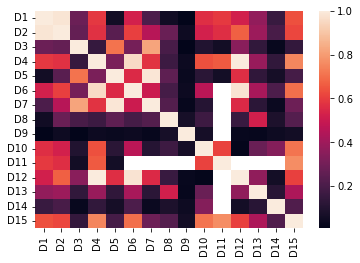

In [26]:
sns.heatmap(d_corr)

In [27]:
def cut_column_50(df):
    identity_name = []
    for i in range(0, len(df.iloc[0,:]) ):
        if (df.iloc[:, i].isnull().sum() / len(df.iloc[:, 0])) < 0.5:
            identity_name.append(df.iloc[:, i].name)
    df = df[identity_name]
    return df
    print(df.info())


d_column_df_2 = cut_column_50(d_column_df)
d_column_df_2

D1     D2    D3    D4   D10    D11    D15
0        14.0    NaN  13.0   NaN  13.0   13.0    0.0
1         0.0    NaN   NaN   0.0   0.0    NaN    0.0
2         0.0    NaN   NaN   0.0   0.0  315.0  315.0
3       112.0  112.0   0.0  94.0  84.0    NaN  111.0
4         0.0    NaN   NaN   NaN   NaN    NaN    NaN
...       ...    ...   ...   ...   ...    ...    ...
590535   29.0   29.0  30.0   NaN  56.0   56.0   56.0
590536    0.0    NaN   NaN   0.0   0.0    0.0    0.0
590537    0.0    NaN   NaN   0.0   0.0    0.0    0.0
590538   22.0   22.0   0.0  22.0  22.0   22.0   22.0
590539    0.0    NaN   0.0   1.0   1.0    0.0    1.0

[590540 rows x 7 columns]

In [28]:
#각 컬럼별 scale 보기
d_column_df_2.describe()

D1             D2             D3             D4  \
count  589271.000000  309743.000000  327662.000000  421618.000000   
mean       94.347568     169.563231      28.343348     140.002441   
std       157.660387     177.315865      62.384721     191.096774   
min         0.000000       0.000000       0.000000    -122.000000   
25%         0.000000      26.000000       1.000000       0.000000   
50%         3.000000      97.000000       8.000000      26.000000   
75%       122.000000     276.000000      27.000000     253.000000   
max       640.000000     640.000000     819.000000     869.000000   

                 D10            D11            D15  
count  514518.000000  311253.000000  501427.000000  
mean      123.982137     146.621465     163.744579  
std       182.615225     186.042622     202.726660  
min         0.000000     -53.000000     -83.000000  
25%         0.000000       0.000000       0.000000  
50%        15.000000      43.000000      52.000000  
75%       197.000000     274.000000     314.000000  
max       876.000000     670.000000     879.000000

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


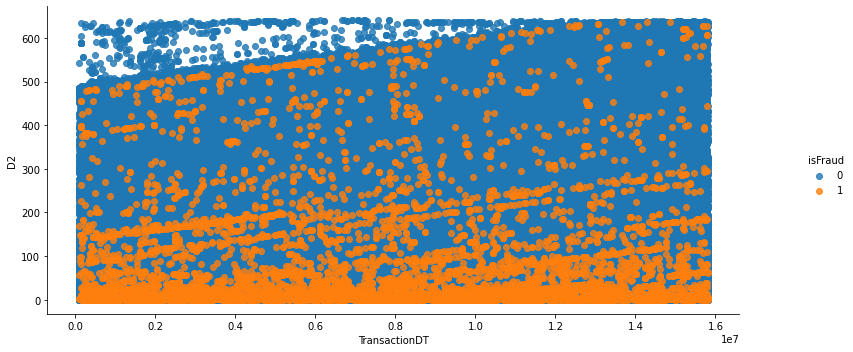

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


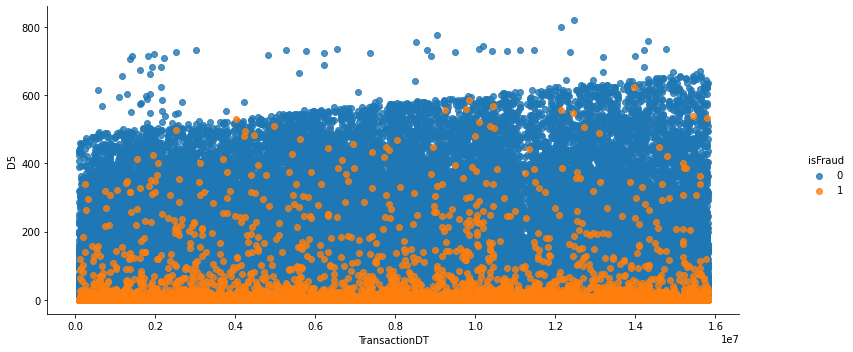

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


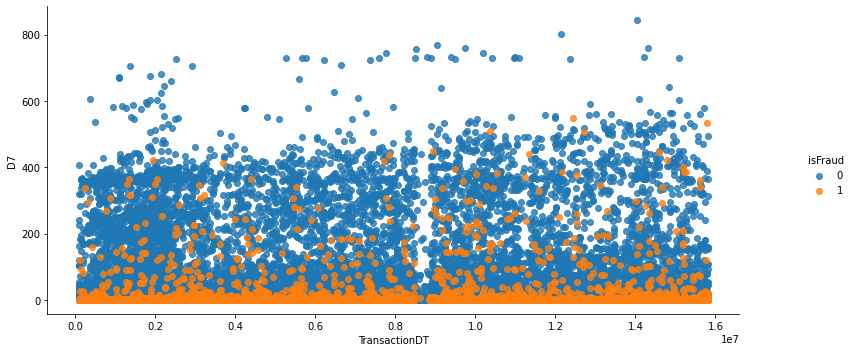

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


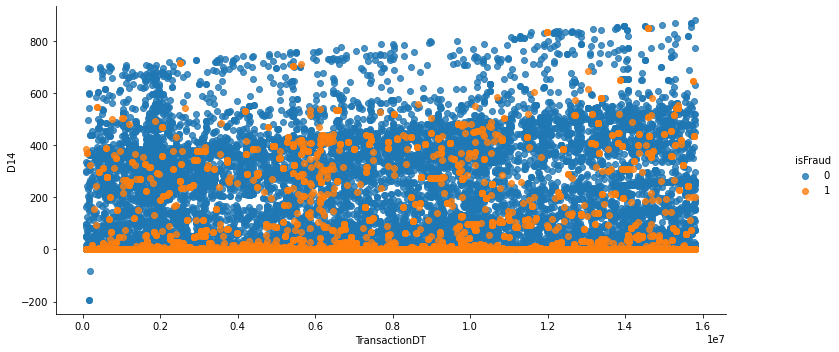

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


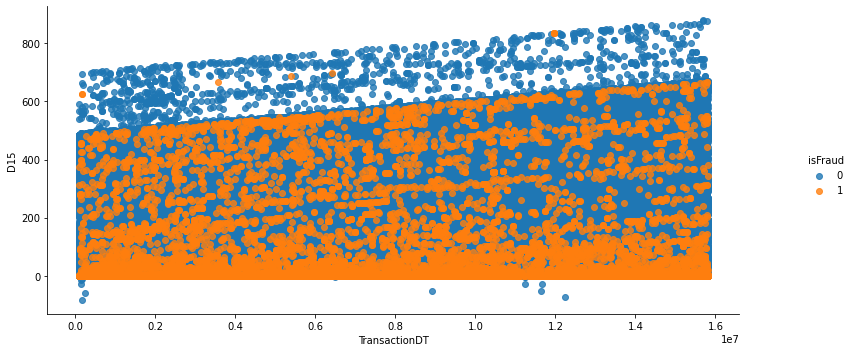

In [29]:
#graph trial - DT & D columns
for i in range(1, 16):
    sns.lmplot('TransactionDT',f'D{i}',  train_transaction, hue='isFraud', fit_reg=False)
    fig = plt.gcf()
    fig.set_size_inches(13, 5)
    plt.show()

D4, D6, D10, D13, D15 : 1차함수로 isfraud  구별 가능 

In [30]:
#drop 없이 VIF 보기 
d_column_df_nona_1 = d_column_df.fillna(-999)

In [31]:
#다중공선성 확인 - 결측치 중간값으로 채운 값 
pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(d_column_df_nona_1.values, idx) for idx in range(d_column_df_nona_1.shape[1])],
    "features": d_column_df_nona_1.columns,
})

VIF Factor features
0     2.574113       D1
1     7.968583       D2
2     8.198815       D3
3     3.733960       D4
4     6.252770       D5
5    57.464720       D6
6    35.845012       D7
7   127.535787       D8
8   175.729384       D9
9     3.469885      D10
10    2.017796      D11
11   57.561010      D12
12   54.559340      D13
13   25.554675      D14
14    4.074870      D15

In [32]:

VIF_list= list(VIF_table.index+1)
d_column_df_2 = d_column_df_nona_1.copy()
for i in (VIF_list[0:10]):
    d_column_df_try = d_column_df_2.drop(columns = f'D{i}')
    print(f'VIF without D{i} column')
    print('---------------')
    print(pd.DataFrame({
        "VIF Factor": [variance_inflation_factor(d_column_df_try.values, idx) for idx in range(d_column_df_try.shape[1])],
        "features": d_column_df_try.columns,
    }))
    d_column_df_2 = d_column_df_try
    print('---------------')

VIF without D12 column
---------------
    VIF Factor features
0     2.573444       D1
1     7.928376       D2
2     8.158745       D3
3     3.714033       D4
4     6.251033       D5
5    40.492097       D6
6    35.832562       D7
7   126.364253       D8
8   174.756107       D9
9     3.448420      D10
10    2.016621      D11
11   44.624592      D13
12   25.538903      D14
13    4.072332      D15
---------------
VIF without D7 column
---------------
    VIF Factor features
0     2.548377       D1
1     7.927502       D2
2     8.137069       D3
3     3.498832       D4
4     5.408016       D5
5    26.954276       D6
6   121.603832       D8
7   160.124723       D9
8     3.437045      D10
9     1.909768      D11
10   44.556690      D13
11   25.531687      D14
12    4.067438      D15
---------------
VIF without D11 column
---------------
    VIF Factor features
0     2.503235       D1
1     7.877938       D2
2     8.135478       D3
3     3.498280       D4
4     5.404501       D5
5    25.8246

In [33]:
#결측치 50% 이상인 컬럼 버리고 -999로 채워주기  

d_column_df_nona = d_column_df_2.fillna(-999)


In [34]:
#fillna with -999 
VIF_table = pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(d_column_df_nona.values, idx) for idx in range(d_column_df_nona.shape[1])],
    "features": d_column_df_nona.columns,
})
VIF_table= VIF_table.sort_values('VIF Factor', ascending = False)
VIF_table

VIF Factor features
2    9.326873       D9
3    8.538806      D13
1    2.849561       D5
0    2.463754       D3
4    1.742762      D15

##### discussion of this block
사용할 feature / reason
- 1, 2, 3, 11, 10, 15 :    
데이터 50% 이상, 각 컬럼간 VIF 10 이하 (결측치 -999로 채움)

In [35]:
#isFraud 컬럼 추가 
d_column_df_nona['isFraud'] = train_transaction['isFraud']
d_column_df_nona.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   D3       590540 non-null  float64
 1   D5       590540 non-null  float64
 2   D9       590540 non-null  float64
 3   D13      590540 non-null  float64
 4   D15      590540 non-null  float64
 5   isFraud  590540 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 27.0 MB


#### 전처리 2

In [36]:
#column drop 

total = pd.concat([tr_trans_pp, test_trans_pp]) 
split_point = len(train_transaction)

#drop
tempX = total.drop(columns=['D4','D5', 'D6', 'D7', 'D8','D9', 'D12', 'D13','D14'])
tr_trans_pp = tempX[:split_point]
test_trans_pp = tempX[split_point:]
print(tr_trans_pp.head(), test_trans_pp.shape)

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000      0.0          86400            68.5         W  13926   
1        2987001      0.0          86401            29.0         W   2755   
2        2987002      0.0          86469            59.0         W   4663   
3        2987003      0.0          86499            50.0         W  18132   
4        2987004      0.0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C3   C5   C9   C13     D1     D2    D3   D10  \
0           

In [37]:
#save
#tr_trans_pp.to_csv('0615_train_pp_ver1', index=False) 
#test_trans_pp.to_csv('0615_test_pp_ver1', index=False) 

#### V-columns

In [38]:
v_column_df = train_transaction[[f'V{i}' for i in range(1,339) ]]
v_corr = v_column_df.corr()
v_corr

V1        V2        V3        V4        V5        V6        V7  \
V1    1.000000  0.032168  0.024830  0.014216  0.013619  0.032284  0.026016   
V2    0.032168  1.000000  0.773039  0.318554  0.305504  0.621459  0.496921   
V3    0.024830  0.773039  1.000000  0.243684  0.353767  0.472570  0.546875   
V4    0.014216  0.318554  0.243684  1.000000  0.915164  0.279596  0.221621   
V5    0.013619  0.305504  0.353767  0.915164  1.000000  0.261490  0.294447   
...        ...       ...       ...       ...       ...       ...       ...   
V334       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V335       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V336       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V337       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V338       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            V8        V9       V10       V11       V12       V13       V14  \
V1    0.040820  0.034009  0.006574  0.006408  0.007637  0.008270       NaN   
V2    0.732730  0.618591  0.036884  0.037459  0.029382  0.039528       NaN   
V3    0.556536  0.653087 -0.005272  0.022911  0.037762  0.053094       NaN   
V4    0.325873  0.273207 -0.013160 -0.016662  0.021255  0.022238       NaN   
V5    0.308716  0.354257 -0.035405 -0.021949  0.024599  0.033612       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
V334       NaN       NaN       NaN       NaN       NaN       NaN  0.009169   
V335       NaN       NaN       NaN       NaN       NaN       NaN  0.058020   
V336       NaN       NaN       NaN       NaN       NaN       NaN  0.037008   
V337       NaN       NaN       NaN       NaN       NaN       NaN  0.034450   
V338       NaN       NaN       NaN       NaN       NaN       NaN  0.062089   

      V15  V16       V17       V18       V19       V20       V21       V22  \
V1    NaN  NaN       NaN       NaN  0.005871  0.006044       NaN       NaN   
V2    NaN  NaN       NaN       NaN  0.012414  0.016543       NaN       NaN   
V3    NaN  NaN       NaN       NaN  0.012790  0.027747       NaN       NaN   
V4    NaN  NaN       NaN       NaN  0.606202  0.573559       NaN       NaN   
V5    NaN  NaN       NaN       NaN  0.567073  0.583701       NaN       NaN   
...   ...  ...       ...       ...       ...       ...       ...       ...   
V334  NaN  NaN  0.011358  0.016036 -0.019005 -0.017522  0.005574  0.002087   
V335  NaN  NaN  0.041462  0.040932 -0.343894 -0.339095  0.053389  0.030947   
V336  NaN  NaN  0.031000  0.038226 -0.202209 -0.198672  0.033753  0.013380   
V337  NaN  NaN  0.057269  0.027134 -0.151791 -0.151260  0.048629 -0.008092   
V338  NaN  NaN  0.065280  0.017789 -0.385448 -0.382547  0.059305 -0.026671   

           V23       V24       V25       V26       V27       V28       V29  \
V1    0.001161  0.001575  0.027331  0.025159       NaN       NaN  0.003917   
V2    0.018433  0.023342  0.009550  0.019023       NaN       NaN -0.027282   
V3    0.014320  0.033975  0.007834  0.026500       NaN       NaN -0.053289   
V4    0.015783  0.022935  0.009867  0.012916       NaN       NaN -0.042741   
V5    0.015019  0.046929  0.009752  0.028920       NaN       NaN -0.061558   
...        ...       ...       ...       ...       ...       ...       ...   
V334  0.028279  0.024913  0.025092  0.020715  0.064524  0.060608       NaN   
V335  0.012074  0.009374  0.042027  0.028969  0.006923  0.008546       NaN   
V336  0.023833  0.024197  0.039931  0.031527  0.024212  0.021624       NaN   
V337  0.021546  0.007061  0.042897  0.030606  0.054890  0.049506       NaN   
V338  0.010677 -0.012567  0.058924  0.039286 -0.032884 -0.032539       NaN   

           V30       V31       V32       V33       V34       V35       V36  \
V1    0.003880       NaN       NaN  0.000839  0.001147  0.005627  0.006161   
V2   -0.026154       NaN       NaN  0.011982  0.018404  0.020577  0.035771   
V3   -0.047531       NaN      

In [39]:
v_column_df.describe()

V1             V2             V3             V4  \
count  311253.000000  311253.000000  311253.000000  311253.000000   
mean        0.999945       1.045204       1.078075       0.846456   
std         0.007390       0.240133       0.320890       0.440053   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         1.000000       8.000000       9.000000       6.000000   

                  V5             V6             V7             V8  \
count  311253.000000  311253.000000  311253.000000  311253.000000   
mean        0.876991       1.045686       1.072870       1.027704   
std         0.475902       0.239385       0.304779       0.186069   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         6.000000       9.000000       9.000000       8.000000   

                  V9            V10            V11            V12  \
count  311253.000000  311253.000000  311253.000000  514467.000000   
mean        1.041529       0.463915       0.478987       0.559711   
std         0.226339       0.521522       0.552431       0.510533   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         8.000000       4.000000       5.000000       3.000000   

                 V13            V14            V15            V16  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.599166       0.999500       0.122342       0.123460   
std         0.532185       0.022345       0.332422       0.342841   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       0.000000   
max         6.000000       1.000000       7.000000      15.000000   

                 V17            V18            V19            V20  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.134040       0.135363       0.816371       0.847843   
std         0.364456       0.371763       0.425512       0.459451   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       1.000000   
50%         0.000000       0.000000       1.000000       1.000000   
75%         0.000000       0.000000       1.000000       1.000000   
max        15.000000      15.000000       7.000000      15.000000   

                 V21            V22            V23            V24  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.129684       0.132292       1.034791       1.058097   
std         0.339060       0.359415       0.247681       0.305485   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       1.000000   
50%         0.000000       0.000000       1.000000       1.000000   
75%         0.000000       0.000000       1.000000       1.000000   
max         5.000000       8.000000      13.000000      13.000000   

                 V25            V26            V27            V28  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.977660       0.988040       0.000776       0.000830   
std         0.185245       0.209302       0.028596       0.031133   
min       

> scaling 및 결측치 처리 후 PCA 해보는 방법도 고려해보자. 

In [6]:

def cut_column(df, num):
    identity_name = []
    for i in range(0, len(df.iloc[0,:]) ):
        if (df.iloc[:, i].isnull().sum() / len(df.iloc[:, 0])) < num :
            identity_name.append(df.iloc[:, i].name)
    df = df[identity_name]
    return df
    print(df.info())

#70퍼센트 이상 데이터가 있는 column만 선택 

v_column_df_2 = cut_column(v_column_df,0.3)

In [41]:
v_column_df_2.describe()

V12            V13            V14            V15  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.559711       0.599166       0.999500       0.122342   
std         0.510533       0.532185       0.022345       0.332422   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         1.000000       1.000000       1.000000       0.000000   
75%         1.000000       1.000000       1.000000       0.000000   
max         3.000000       6.000000       1.000000       7.000000   

                 V16            V17            V18            V19  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.123460       0.134040       0.135363       0.816371   
std         0.342841       0.364456       0.371763       0.425512   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max        15.000000      15.000000      15.000000       7.000000   

                 V20            V21            V22            V23  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.847843       0.129684       0.132292       1.034791   
std         0.459451       0.339060       0.359415       0.247681   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       1.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         1.000000       0.000000       0.000000       1.000000   
max        15.000000       5.000000       8.000000      13.000000   

                 V24            V25            V26            V27  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        1.058097       0.977660       0.988040       0.000776   
std         0.305485       0.185245       0.209302       0.028596   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       0.000000   
50%         1.000000       1.000000       1.000000       0.000000   
75%         1.000000       1.000000       1.000000       0.000000   
max        13.000000       7.000000      13.000000       4.000000   

                 V28            V29            V30            V31  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.000830       0.387840       0.406436       0.140761   
std         0.031133       0.510652       0.554311       0.355793   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       1.000000       1.000000       0.000000   
max         4.000000       5.000000       9.000000       7.000000   

                 V32            V33            V34            V35  \
count  514467.000000  514467.000000  514467.000000  421571.000000   
mean        0.142417       0.130693       0.139154       0.542594   
std         0.368278       0.340900       0.357549       0.516010   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max        15.000000       7.000000      13.000000       3.000000   

                 V36            V37           V38            V39  \
count  421571.000000  421571.000000  421571.00000  421571.000000   
mean        0.579198       1.108065       1.16240       0.166076   
std         0.539039       0.690571       0.85892       0.451956   
min         0

In [42]:
len(v_column_df_2.columns)

169

In [43]:
#nunique 가 평균값 개 이하인 column 들은 범주형일 것으로 추측
# median = 32개 이상인 numerical column만 사용하자
more_than_mean_vlist = []
for i in v_column_df_2.columns :
    if v_column_df_2[i].nunique() > 32: #np.median(v_column_df.nunique()) = 32
        more_than_mean_vlist.append(i)
print(more_than_mean_vlist)

['V37', 'V38', 'V44', 'V45', 'V56', 'V95', 'V96', 'V97', 'V99', 'V101', 'V102', 'V103', 'V105', 'V106', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V282', 'V283', 'V285', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V298', 'V299', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']


In [44]:
num_colums_v = train_transaction.loc[:,more_than_mean_vlist]
num_colums_v.describe()

V37           V38            V44            V45  \
count  421571.000000  421571.00000  421571.000000  421571.000000   
mean        1.108065       1.16240       1.083891       1.120779   
std         0.690571       0.85892       0.639143       0.729774   
min         0.000000       0.00000       0.000000       0.000000   
25%         1.000000       1.00000       1.000000       1.000000   
50%         1.000000       1.00000       1.000000       1.000000   
75%         1.000000       1.00000       1.000000       1.000000   
max        54.000000      54.00000      48.000000      48.000000   

                 V56            V95           V96            V97  \
count  513444.000000  590226.000000  590226.00000  590226.000000   
mean        1.120979       1.038019       3.00519       1.718933   
std         0.661129      21.034304      40.23949      27.700449   
min         0.000000       0.000000       0.00000       0.000000   
25%         1.000000       0.000000       0.00000       0.000000   
50%         1.000000       0.000000       0.00000       0.000000   
75%         1.000000       0.000000       1.00000       0.000000   
max        51.000000     880.000000    1410.00000     976.000000   

                 V99           V101           V102           V103  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean        0.894986       0.889249       1.827229       1.279288   
std         2.722552      20.582571      35.928456      25.685642   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max        88.000000     869.000000    1285.000000     928.000000   

                V105           V106           V126           V127  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean        0.281145       0.164584     129.979417     336.611559   
std         3.373948       1.825665    2346.951681    4238.666949   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000     107.949997   
max        99.000000      55.000000  160000.000000  160000.000000   

                V128           V129           V130           V131  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean      204.094038       8.768944      92.165849      31.133302   
std      3010.258774     113.832828     315.960485     161.161258   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000      59.000000       0.000000   
max    160000.000000   55125.000000   55125.000000   55125.000000   

                V132           V133           V134           V135  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean      103.513188     204.889160     145.972328      17.250132   
std      2266.106140    3796.316755    2772.986817     293.847563   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     93736.000000  133915.000000   98476.000000   90750.000000   

                V136           V137           V279           V280  \
count  590226.000000  590226.000000  590528.000000  590528.000000   
mean       38.821196      26.365090       1.123061       1.967082   
std       451.808411     348.332714      21.021950      27.851780   
min         0.000000       

<AxesSubplot:>

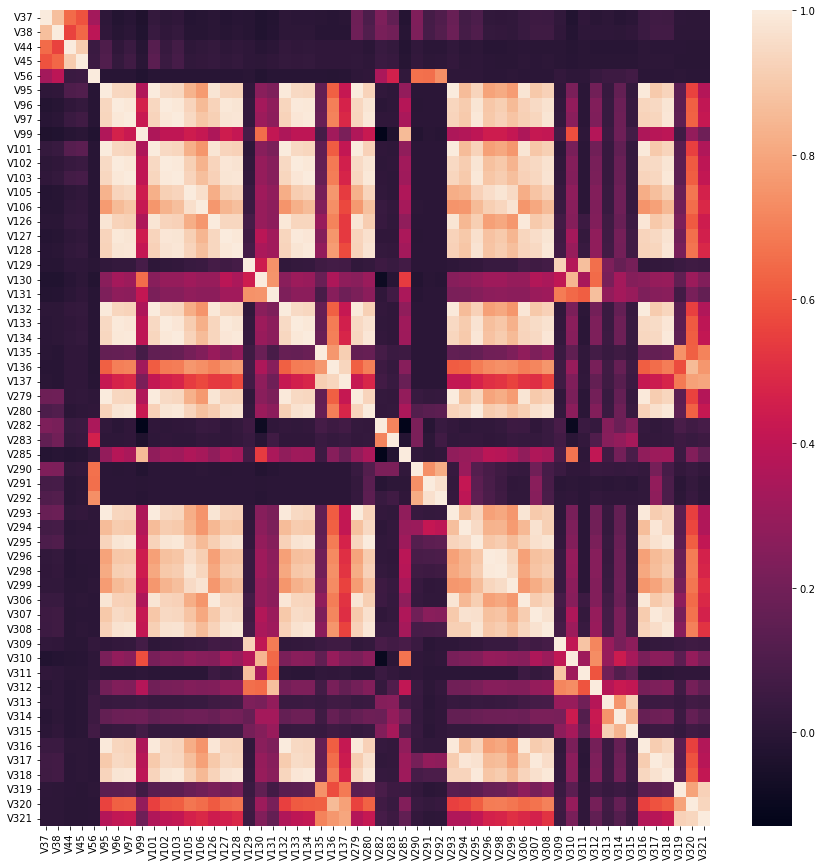

In [45]:
#corr heatmap 
plt.figure(figsize=(15,15))
sns.heatmap(num_colums_v.corr())

In [46]:
#scaling
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

v2_scaled_data = scaler.fit_transform(num_colums_v)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\n\nv2_scaled_data = scaler.fit_transform(num_colums_v)'

In [47]:
#v_column_mmscale = pd.DataFrame(v2_scaled_data, columns=num_colums_v.columns, index=list(num_colums_v.index.values))
#v_column_mmscale.head()

In [48]:
#termination 
#선별된 V columns들 중 VIF 확인
imsi = v_column_mmscale.dropna()

VIF_table = pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(imsi.values, idx) for idx in range(imsi.shape[1])],
    "features": imsi.columns,
})

VIF_table

NameError: name 'v_column_mmscale' is not defined

In [ ]:
#termination 
VIF_table = VIF_table.sort_values('VIF Factor', ascending = False)
VIF_table.head()

In [ ]:
#------------------------termination 
# 생각한 순서대로 돌아가지 X 

VIF_list= list(VIF_table.features)
v_column_df_2 = imsi.copy()
for i in VIF_list:
    for i in (VIF_list[0:40]):
        v_column_df_try = v_column_df_2.drop(columns = i)
        print(f'VIF without {i} column')
        print('---------------')
        print(pd.DataFrame({
            "VIF Factor": [variance_inflation_factor(v_column_df_try.values, idx) for idx in range(v_column_df_try.shape[1])],
            "features": v_column_df_try.columns,
        }))
        v_column_df_2 = v_column_df_try
        print('---------------')
    

In [46]:
#PCA1
num_colums_v_1 = v_column_df_2.fillna(-1)
apply_PCA(num_colums_v_1, True)


TypeError: apply_PCA() missing 1 required positional argument: 'show_plot'

In [71]:
#PCA 2

num_colums_v_PCA = num_colums_v.fillna(-1)
pca_df = apply_PCA(num_colums_v_PCA,0.9, True)


explained variance ratio: [0.95256981]
shape: (590540, 1)


pca_df


PC1
0       -578.791219
1       -752.637215
2       -752.637215
3       2567.732343
4       -752.637173
...             ...
590535  -713.993435
590536  -752.637215
590537  -752.637215
590538  2036.793555
590539  -236.016814

[590540 rows x 1 columns]

##### discussion of this block
- 결측치 30% 이하인 컬럼들만 선정
- PCA를 위해 결측치를 -1로 채워줌 (모든 컬럼 value가 양수)
- V column을 PC1, 2, 3 로 대체 

#### 전처리 3

explained variance ratio: [0.84876507 0.05005935 0.03832916]
shape: (1097231, 3)


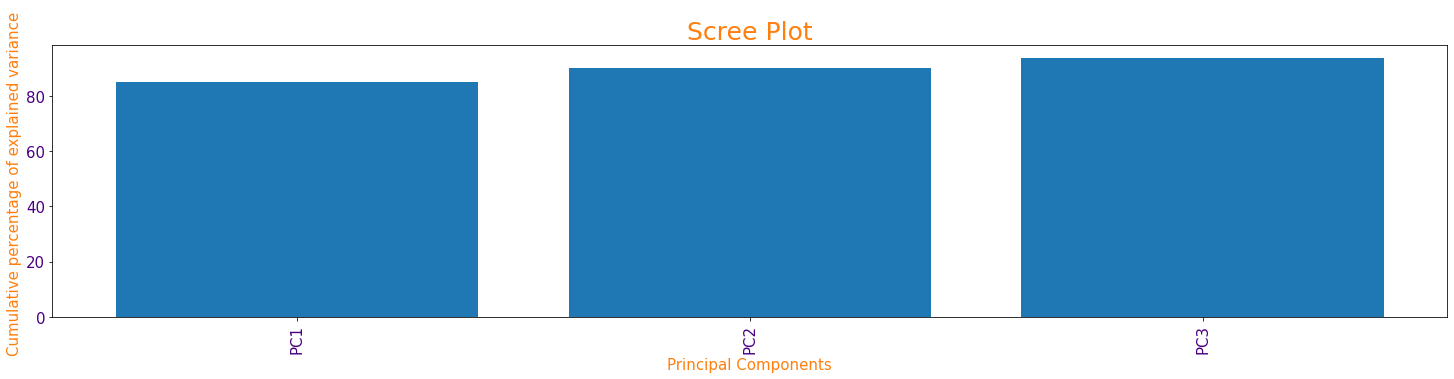

pca_df


PC1         PC2         PC3
0        -414.605554  -99.819259  100.066514
1        -581.849403 -115.593458  -18.591293
2        -581.849421 -115.593437  -18.591291
3        2675.079606   77.806453  998.550570
4        -581.849185 -115.593577  -18.591272
...              ...         ...         ...
1097226  -581.849416 -115.593464  -18.591276
1097227  -568.363349  -98.716300   -7.826485
1097228  -581.849421 -115.593437  -18.591291
1097229  -581.849421 -115.593437  -18.591291
1097230  -581.849393 -115.593484  -18.591277

[1097231 rows x 3 columns]

In [50]:
total = pd.concat([tr_trans_pp, test_trans_pp], ignore_index = True) 
v_column_df = total[[f'V{i}' for i in range(1,339) ]]
v_column_df_2 = cut_column(v_column_df,0.3)
num_colums_v_1 = v_column_df_2.fillna(-1)
pca_df = apply_PCA(num_colums_v_1,0.9, True)

In [51]:
total = total.drop(columns = [f'V{i}' for i in range(1,340) ], axis = 1)
total

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0              2987000      0.0          86400          68.500         W   
1              2987001      0.0          86401          29.000         W   
2              2987002      0.0          86469          59.000         W   
3              2987003      0.0          86499          50.000         W   
4              2987004      0.0          86506          50.000         H   
...                ...      ...            ...             ...       ...   
1097226        4170235      NaN       34214279          94.679         C   
1097227        4170236      NaN       34214287          12.173         C   
1097228        4170237      NaN       34214326          49.000         W   
1097229        4170238      NaN       34214337         202.000         W   
1097230        4170239      NaN       34214345          24.346         C   

         card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0        13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0   
1         2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN   
2         4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0   
3        18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN   
4         4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
...        ...    ...    ...         ...    ...     ...    ...    ...    ...   
1097226  13832  375.0  185.0  mastercard  224.0   debit  284.0   60.0    NaN   
1097227   3154  408.0  185.0  mastercard  224.0   debit    NaN    NaN    NaN   
1097228  16661  490.0  150.0        visa  226.0   debit  327.0   87.0    NaN   
1097229  16621  516.0  150.0  mastercard  224.0   debit  177.0   87.0    NaN   
1097230   5713  168.0  144.0        visa  147.0  credit    NaN    NaN    NaN   

         dist2 P_emaildomain R_emaildomain   C3   C5   C9   C13     D1     D2  \
0          NaN           NaN           NaN  0.0  0.0  1.0   1.0   14.0    NaN   
1          NaN     gmail.com           NaN  0.0  0.0  0.0   1.0    0.0    NaN   
2          NaN   outlook.com           NaN  0.0  0.0  1.0   1.0    0.0    NaN   
3          NaN     yahoo.com           NaN  0.0  0.0  1.0  25.0  112.0  112.0   
4          NaN     gmail.com           NaN  0.0  0.0  0.0   1.0    0.0    NaN   
...        ...           ...           ...  ...  ...  ...   ...    ...    ...   
1097226    NaN     gmail.com     gmail.com  0.0  0.0  0.0   1.0    0.0    NaN   
1097227  157.0   hotmail.com   hotmail.com  0.0  0.0  0.0   3.0   16.0   16.0   
1097228    NaN   hotmail.com           NaN  0.0  0.0  1.0   1.0    0.0    NaN   
1097229    NaN   hotmail.com           NaN  0.0  0.0  1.0   1.0    0.0    NaN   
1097230    NaN   hotmail.com   hotmail.com  0.0  0.0  0.0   1.0    0.0    NaN   

           D3   D10    D11    D15   M1   M2   M3   M4   M5   M6   M7   M8   M9  
0        13.0  13.0   13.0    0.0    T    T    T   M2    F    T  NaN  NaN  NaN  
1         NaN   0.0    NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN  NaN  
2         NaN   0.0  315.0  315.0    T    T    T   M0    F    F    F    F    F  
3         0.0  84.0    NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN  NaN  
4         NaN   NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...       ...   ...    ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1097226   NaN   0.0    NaN    0.0  NaN  NaN  NaN   M2  NaN  NaN  NaN  NaN  NaN  
1097227  16.0   0.0    NaN   16.0  NaN  NaN  NaN   M2  NaN  NaN  NaN  NaN  NaN  
1097228   NaN   0.0    0.0    0.0    T    T    T   M0    F    F    F    T    T  
1097229   NaN   0.0    0.0    0.0    T    T    T   M0    F    F    F    F    F  
1097230   NaN   0.0    NaN    0.0  NaN  NaN  NaN   M2  NaN  NaN  NaN  NaN  NaN  

[1097231 rows x 36 columns]

In [53]:
tempX = pd.concat([total, pca_df],axis =1 )

tempX

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0              2987000      0.0          86400          68.500         W   
1              2987001      0.0          86401          29.000         W   
2              2987002      0.0          86469          59.000         W   
3              2987003      0.0          86499          50.000         W   
4              2987004      0.0          86506          50.000         H   
...                ...      ...            ...             ...       ...   
1097226        4170235      NaN       34214279          94.679         C   
1097227        4170236      NaN       34214287          12.173         C   
1097228        4170237      NaN       34214326          49.000         W   
1097229        4170238      NaN       34214337         202.000         W   
1097230        4170239      NaN       34214345          24.346         C   

         card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0        13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0   
1         2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN   
2         4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0   
3        18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN   
4         4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
...        ...    ...    ...         ...    ...     ...    ...    ...    ...   
1097226  13832  375.0  185.0  mastercard  224.0   debit  284.0   60.0    NaN   
1097227   3154  408.0  185.0  mastercard  224.0   debit    NaN    NaN    NaN   
1097228  16661  490.0  150.0        visa  226.0   debit  327.0   87.0    NaN   
1097229  16621  516.0  150.0  mastercard  224.0   debit  177.0   87.0    NaN   
1097230   5713  168.0  144.0        visa  147.0  credit    NaN    NaN    NaN   

         dist2 P_emaildomain R_emaildomain   C3   C5   C9   C13     D1     D2  \
0          NaN           NaN           NaN  0.0  0.0  1.0   1.0   14.0    NaN   
1          NaN     gmail.com           NaN  0.0  0.0  0.0   1.0    0.0    NaN   
2          NaN   outlook.com           NaN  0.0  0.0  1.0   1.0    0.0    NaN   
3          NaN     yahoo.com           NaN  0.0  0.0  1.0  25.0  112.0  112.0   
4          NaN     gmail.com           NaN  0.0  0.0  0.0   1.0    0.0    NaN   
...        ...           ...           ...  ...  ...  ...   ...    ...    ...   
1097226    NaN     gmail.com     gmail.com  0.0  0.0  0.0   1.0    0.0    NaN   
1097227  157.0   hotmail.com   hotmail.com  0.0  0.0  0.0   3.0   16.0   16.0   
1097228    NaN   hotmail.com           NaN  0.0  0.0  1.0   1.0    0.0    NaN   
1097229    NaN   hotmail.com           NaN  0.0  0.0  1.0   1.0    0.0    NaN   
1097230    NaN   hotmail.com   hotmail.com  0.0  0.0  0.0   1.0    0.0    NaN   

           D3   D10    D11    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0        13.0  13.0   13.0    0.0    T    T    T   M2    F    T  NaN  NaN   
1         NaN   0.0    NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2         NaN   0.0  315.0  315.0    T    T    T   M0    F    F    F    F   
3         0.0  84.0    NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4         NaN   NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...       ...   ...    ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   
1097226   NaN   0.0    NaN    0.0  NaN  NaN  NaN   M2  NaN  NaN  NaN  NaN   
1097227  16.0   0.0    NaN   16.0  NaN  NaN  NaN   M2  NaN  NaN  NaN  NaN   
1097228   NaN   0.0    0.0    0.0    T    T    T   M0    F    F    F    T   
1097229   NaN   0.0    0.0    0.0    T    T    T   M0    F    F    F    F   
1097230   NaN   0.0    NaN    0.0  NaN  NaN  NaN   M2  NaN  NaN  NaN  NaN   

          M9          PC1         PC2         PC3  
0        NaN  -414.605554  -99.819259  100.066514  
1        NaN  -581.849403 -115.593458  -18.591293  
2          F  -581.849421 -115.593437  -18.591291  
3        NaN  2675.079606   7

In [54]:
#split 
split_point = len(train_transaction)

tr_trans_pp = tempX[:split_point]
test_trans_pp = tempX[split_point:]
print(tr_trans_pp.head(), test_trans_pp.shape)

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000      0.0          86400            68.5         W  13926   
1        2987001      0.0          86401            29.0         W   2755   
2        2987002      0.0          86469            59.0         W   4663   
3        2987003      0.0          86499            50.0         W  18132   
4        2987004      0.0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C3   C5   C9   C13     D1     D2    D3   D10  \
0           

In [55]:
#save
tr_trans_pp.to_csv('0615_train_pp_ver1.csv', index=False) 
test_trans_pp.to_csv('0615_test_pp_ver1.csv', index=False) 

---

### Identity table column 선정

In [24]:
tr_trans_pp = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/0615_train_pp_ver1.csv')

In [3]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [20]:
train_id_cut = cut_column(train_identity, 0.3)
train_id_cut

TransactionID  id_01     id_02  id_05  id_06  id_11     id_12  id_13  \
0             2987004    0.0   70787.0    NaN    NaN  100.0  NotFound    NaN   
1             2987008   -5.0   98945.0    0.0   -5.0  100.0  NotFound   49.0   
2             2987010   -5.0  191631.0    0.0    0.0  100.0  NotFound   52.0   
3             2987011   -5.0  221832.0    0.0   -6.0  100.0  NotFound   52.0   
4             2987016    0.0    7460.0    1.0    0.0  100.0  NotFound    NaN   
...               ...    ...       ...    ...    ...    ...       ...    ...   
144228        3577521  -15.0  145955.0    0.0    0.0  100.0  NotFound   27.0   
144229        3577526   -5.0  172059.0    1.0   -5.0  100.0  NotFound   27.0   
144230        3577529  -20.0  632381.0   -1.0  -36.0  100.0  NotFound   27.0   
144231        3577531   -5.0   55528.0    0.0   -7.0  100.0  NotFound   27.0   
144232        3577534  -45.0  339406.0  -10.0 -100.0  100.0  NotFound   27.0   

        id_15     id_16  ...  id_20  id_28     id_29                    id_31  \
0         New  NotFound  ...  144.0    New  NotFound      samsung browser 6.2   
1         New  NotFound  ...  500.0    New  NotFound       mobile safari 11.0   
2       Found     Found  ...  142.0  Found     Found              chrome 62.0   
3         New  NotFound  ...  507.0    New  NotFound              chrome 62.0   
4       Found     Found  ...  575.0  Found     Found              chrome 62.0   
...       ...       ...  ...    ...    ...       ...                      ...   
144228  Found     Found  ...  139.0  Found     Found  chrome 66.0 for android   
144229    New  NotFound  ...  333.0    New  NotFound  chrome 55.0 for android   
144230    New  NotFound  ...  411.0    New  NotFound  chrome 65.0 for android   
144231  Found     Found  ...  368.0  Found     Found              chrome 66.0   
144232    New  NotFound  ...  595.0    New  NotFound  chrome 66.0 for android   

       id_35 id_36 id_37 id_38 DeviceType                          DeviceInfo  
0          T     F     T     T     mobile       SAMSUNG SM-G892A Build/NRD90M  
1          T     F     F     T     mobile                          iOS Device  
2          F     F     T     T    desktop                             Windows  
3          F     F     T     T    desktop                                 NaN  
4          T     F     T     T    desktop                               MacOS  
...      ...   ...   ...   ...        ...                                 ...  
144228     F     F     T     F     mobile             F3111 Build/33.3.A.1.97  
144229     T     F     T     F     mobile                 A574BL Build/NMF26F  
144230     F     F     T     F     mobile  Moto E (4) Plus Build/NMA26.42-152  
144231     T     F     T     F    desktop                               MacOS  
144232     F     F     T     F     mobile         RNE-L03 Build/HUAWEIRNE-L03  

[144233 rows x 22 columns]

In [17]:
train_id_cut.describe()
#id_02는 scaling 필요할 것 같다 

TransactionID          id_01          id_02          id_05  \
count   1.442330e+05  144233.000000  140872.000000  136865.000000   
mean    3.236329e+06     -10.170502  174716.584708       1.615585   
std     1.788496e+05      14.347949  159651.816856       5.249856   
min     2.987004e+06    -100.000000       1.000000     -72.000000   
25%     3.077142e+06     -10.000000   67992.000000       0.000000   
50%     3.198818e+06      -5.000000  125800.500000       0.000000   
75%     3.392923e+06      -5.000000  228749.000000       1.000000   
max     3.577534e+06       0.000000  999595.000000      52.000000   

               id_06          id_11          id_13          id_17  \
count  136865.000000  140978.000000  127320.000000  139369.000000   
mean       -6.698710      99.745325      48.053071     189.451377   
std        16.491104       1.127602      11.774858      30.375360   
min      -100.000000      90.000000      10.000000     100.000000   
25%        -6.000000     100.000000      49.000000     166.000000   
50%         0.000000     100.000000      52.000000     166.000000   
75%         0.000000     100.000000      52.000000     225.000000   
max         0.000000     100.000000      64.000000     229.000000   

               id_19          id_20  
count  139318.000000  139261.000000  
mean      353.128174     403.882666  
std       141.095343     152.160327  
min       100.000000     100.000000  
25%       266.000000     256.000000  
50%       341.000000     472.000000  
75%       427.000000     533.000000  
max       671.000000     661.000000

In [63]:
train_id_cut.describe(include=['O'])

id_12   id_15   id_16   id_28   id_29        id_31   id_35   id_36  \
count     144233  140985  129340  140978  140978       140282  140985  140985   
unique         2       3       2       2       2          130       2       2   
top     NotFound   Found   Found   Found   Found  chrome 63.0       T       F   
freq      123025   67728   66324   76232   74926        22000   77814  134066   

         id_37   id_38 DeviceType DeviceInfo  
count   140985  140985     140810     118666  
unique       2       2          2       1786  
top          T       F    desktop    Windows  
freq    110452   73922      85165      47722

In [33]:
tr_merged_right = pd.merge(train_id_cut,tr_trans_pp, how="inner", on = 'TransactionID')
tr_merged_left = pd.merge(train_id_cut,tr_trans_pp, how="outer", on = 'TransactionID')

In [34]:
tr_merged_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 60 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   590540 non-null  int64  
 1   id_01           144233 non-null  float64
 2   id_02_scaled    140872 non-null  float64
 3   id_05           136865 non-null  float64
 4   id_06           136865 non-null  float64
 5   id_11           140978 non-null  float64
 6   id_12           144233 non-null  object 
 7   id_13           127320 non-null  float64
 8   id_15           140985 non-null  object 
 9   id_16           129340 non-null  object 
 10  id_17           139369 non-null  float64
 11  id_19           139318 non-null  float64
 12  id_20           139261 non-null  float64
 13  id_28           140978 non-null  object 
 14  id_29           140978 non-null  object 
 15  id_31           140282 non-null  object 
 16  id_35           140985 non-null  object 
 17  id_36     

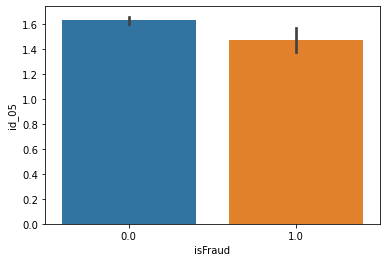

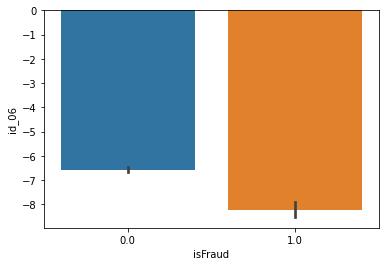

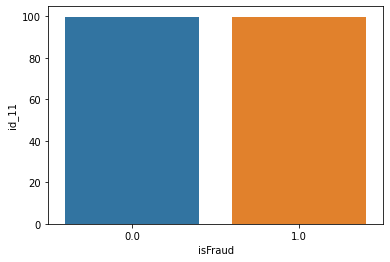

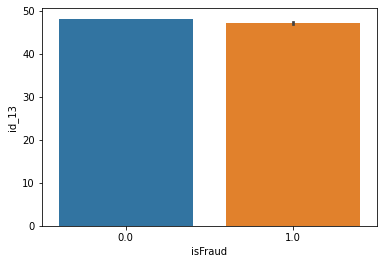

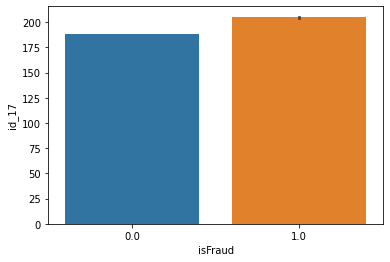

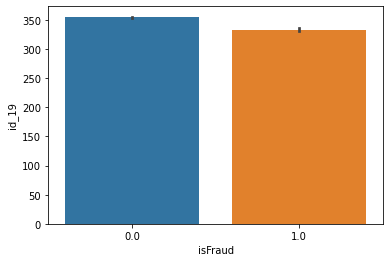

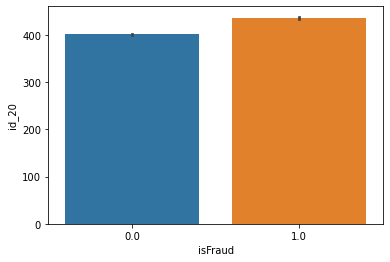

In [82]:
ls = ['id_01','id_02','id_05','id_06','id_11','id_13','id_17','id_19','id_20']
for i in range(len(ls)) :
    ax = sns.barplot(x="isFraud", y= ls[i] , data=tr_merged)
    plt.show()

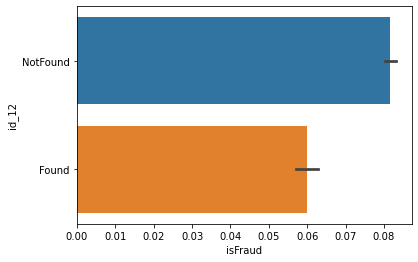

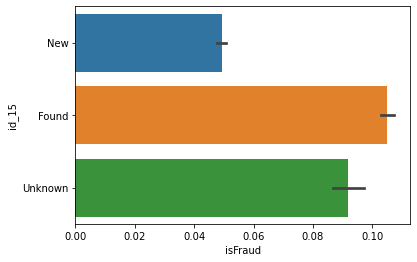

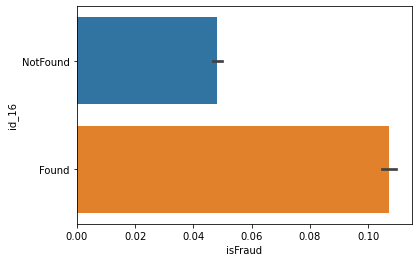

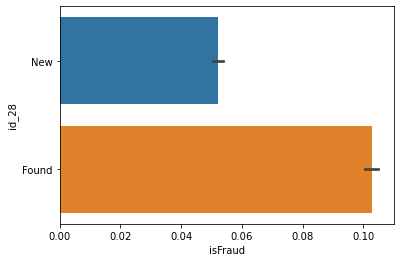

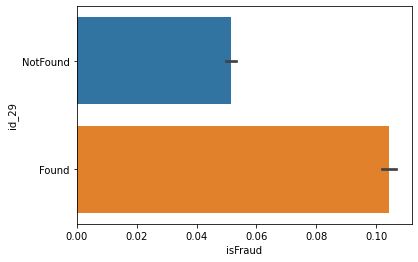

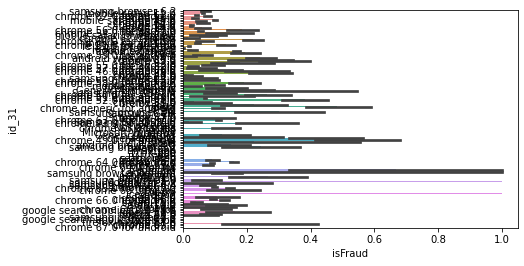

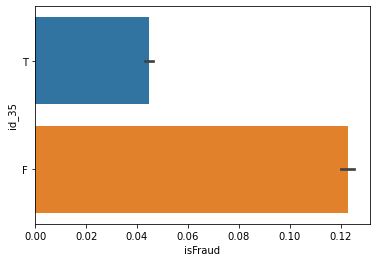

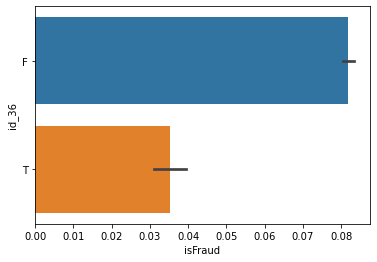

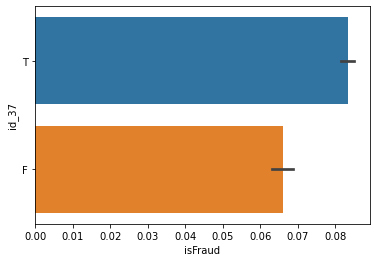

In [98]:
ls_2 = ['id_12','id_15','id_16','id_28','id_29','id_35','id_36','id_37','id_38','DeviceType','DeviceInfo']
for i in range(len(ls)) :
    ax = sns.barplot(x="isFraud", y= ls_2[i] , data=tr_merged)
    plt.show()

In [21]:
#id_02 column scaling with log(x+1) 
A_n = np.log1p(train_id_cut['id_02'])
train_id_cut.insert(2, 'id_02_scaled', A_n)
train_id_cut.drop(['id_02'], axis=1, inplace=True)
train_id_cut

/var/folders/5m/j1nv4tbn34l6v5n5hjqzx0c40000gn/T/ipykernel_1304/85236561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_id_cut.drop(['id_02'], axis=1, inplace=True)


TransactionID  id_01  id_02_scaled  id_05  id_06  id_11     id_12  \
0             2987004    0.0     11.167445    NaN    NaN  100.0  NotFound   
1             2987008   -5.0     11.502330    0.0   -5.0  100.0  NotFound   
2             2987010   -5.0     12.163332    0.0    0.0  100.0  NotFound   
3             2987011   -5.0     12.309680    0.0   -6.0  100.0  NotFound   
4             2987016    0.0      8.917445    1.0    0.0  100.0  NotFound   
...               ...    ...           ...    ...    ...    ...       ...   
144228        3577521  -15.0     11.891060    0.0    0.0  100.0  NotFound   
144229        3577526   -5.0     12.055599    1.0   -5.0  100.0  NotFound   
144230        3577529  -20.0     13.357249   -1.0  -36.0  100.0  NotFound   
144231        3577531   -5.0     10.924661    0.0   -7.0  100.0  NotFound   
144232        3577534  -45.0     12.734955  -10.0 -100.0  100.0  NotFound   

        id_13  id_15     id_16  ...  id_20  id_28     id_29  \
0         NaN    New  NotFound  ...  144.0    New  NotFound   
1        49.0    New  NotFound  ...  500.0    New  NotFound   
2        52.0  Found     Found  ...  142.0  Found     Found   
3        52.0    New  NotFound  ...  507.0    New  NotFound   
4         NaN  Found     Found  ...  575.0  Found     Found   
...       ...    ...       ...  ...    ...    ...       ...   
144228   27.0  Found     Found  ...  139.0  Found     Found   
144229   27.0    New  NotFound  ...  333.0    New  NotFound   
144230   27.0    New  NotFound  ...  411.0    New  NotFound   
144231   27.0  Found     Found  ...  368.0  Found     Found   
144232   27.0    New  NotFound  ...  595.0    New  NotFound   

                          id_31 id_35 id_36 id_37 id_38 DeviceType  \
0           samsung browser 6.2     T     F     T     T     mobile   
1            mobile safari 11.0     T     F     F     T     mobile   
2                   chrome 62.0     F     F     T     T    desktop   
3                   chrome 62.0     F     F     T     T    desktop   
4                   chrome 62.0     T     F     T     T    desktop   
...                         ...   ...   ...   ...   ...        ...   
144228  chrome 66.0 for android     F     F     T     F     mobile   
144229  chrome 55.0 for android     T     F     T     F     mobile   
144230  chrome 65.0 for android     F     F     T     F     mobile   
144231              chrome 66.0     T     F     T     F    desktop   
144232  chrome 66.0 for android     F     F     T     F     mobile   

                                DeviceInfo  
0            SAMSUNG SM-G892A Build/NRD90M  
1                               iOS Device  
2                                  Windows  
3                                      NaN  
4                                    MacOS  
...                                    ...  
144228             F3111 Build/33.3.A.1.97  
144229                 A574BL Build/NMF26F  
144230  Moto E (4) Plus Build/NMA26.42-152  
144231                               MacOS  
144232         RNE-L03 Build/HUAWEIRNE-L03  

[144233 rows x 22 columns]

In [19]:
train_id_cut.describe()

TransactionID          id_01   id_02_scaled          id_05  \
count   1.442330e+05  144233.000000  140872.000000  136865.000000   
mean    3.236329e+06     -10.170502       5.031565       1.615585   
std     1.788496e+05      14.347949       0.531066       5.249856   
min     2.987004e+06    -100.000000       0.000000     -72.000000   
25%     3.077142e+06     -10.000000       4.832458       0.000000   
50%     3.198818e+06      -5.000000       5.099682       0.000000   
75%     3.392923e+06      -5.000000       5.359359       1.000000   
max     3.577534e+06       0.000000       5.999824      52.000000   

               id_06          id_11          id_13          id_17  \
count  136865.000000  140978.000000  127320.000000  139369.000000   
mean       -6.698710      99.745325      48.053071     189.451377   
std        16.491104       1.127602      11.774858      30.375360   
min      -100.000000      90.000000      10.000000     100.000000   
25%        -6.000000     100.000000      49.000000     166.000000   
50%         0.000000     100.000000      52.000000     166.000000   
75%         0.000000     100.000000      52.000000     225.000000   
max         0.000000     100.000000      64.000000     229.000000   

               id_19          id_20  
count  139318.000000  139261.000000  
mean      353.128174     403.882666  
std       141.095343     152.160327  
min       100.000000     100.000000  
25%       266.000000     256.000000  
50%       341.000000     472.000000  
75%       427.000000     533.000000  
max       671.000000     661.000000

In [125]:
def browser(x):
    if type(x) != 'str':
        pass
    elif 'samsung' in x :
        return "samsung"
    elif 'safari' in x :
        return "apple"
    elif 'chrome' in x :
        return "google"
    elif 'edge' in x : # |'ie'|'Microsoft'
        return "MS" 
    elif 'firefox' in x :
        return "firefox" 
    else:
        return "else"

tr_merged['browser'] = tr_merged.id_31.map(browser)

In [133]:
tr_merged 

TransactionID  id_01     id_02  id_05  id_06  id_11     id_12  id_13  \
0             2987004    0.0   70787.0    NaN    NaN  100.0  NotFound    NaN   
1             2987008   -5.0   98945.0    0.0   -5.0  100.0  NotFound   49.0   
2             2987010   -5.0  191631.0    0.0    0.0  100.0  NotFound   52.0   
3             2987011   -5.0  221832.0    0.0   -6.0  100.0  NotFound   52.0   
4             2987016    0.0    7460.0    1.0    0.0  100.0  NotFound    NaN   
...               ...    ...       ...    ...    ...    ...       ...    ...   
144228        3577521  -15.0  145955.0    0.0    0.0  100.0  NotFound   27.0   
144229        3577526   -5.0  172059.0    1.0   -5.0  100.0  NotFound   27.0   
144230        3577529  -20.0  632381.0   -1.0  -36.0  100.0  NotFound   27.0   
144231        3577531   -5.0   55528.0    0.0   -7.0  100.0  NotFound   27.0   
144232        3577534  -45.0  339406.0  -10.0 -100.0  100.0  NotFound   27.0   

        id_15     id_16  id_17  id_19  id_20  id_28     id_29  \
0         New  NotFound  166.0  542.0  144.0    New  NotFound   
1         New  NotFound  166.0  621.0  500.0    New  NotFound   
2       Found     Found  121.0  410.0  142.0  Found     Found   
3         New  NotFound  225.0  176.0  507.0    New  NotFound   
4       Found     Found  166.0  529.0  575.0  Found     Found   
...       ...       ...    ...    ...    ...    ...       ...   
144228  Found     Found  225.0  427.0  139.0  Found     Found   
144229    New  NotFound  166.0  352.0  333.0    New  NotFound   
144230    New  NotFound  225.0  567.0  411.0    New  NotFound   
144231  Found     Found  166.0  352.0  368.0  Found     Found   
144232    New  NotFound  225.0  417.0  595.0    New  NotFound   

                          id_31 id_35 id_36 id_37 id_38 DeviceType  \
0           samsung browser 6.2     T     F     T     T     mobile   
1            mobile safari 11.0     T     F     F     T     mobile   
2                   chrome 62.0     F     F     T     T    desktop   
3                   chrome 62.0     F     F     T     T    desktop   
4                   chrome 62.0     T     F     T     T    desktop   
...                         ...   ...   ...   ...   ...        ...   
144228  chrome 66.0 for android     F     F     T     F     mobile   
144229  chrome 55.0 for android     T     F     T     F     mobile   
144230  chrome 65.0 for android     F     F     T     F     mobile   
144231              chrome 66.0     T     F     T     F    desktop   
144232  chrome 66.0 for android     F     F     T     F     mobile   

                                DeviceInfo  isFraud  TransactionDT  \
0            SAMSUNG SM-G892A Build/NRD90M      0.0          86506   
1                               iOS Device      0.0          86535   
2                                  Windows      0.0          86549   
3                                      NaN      0.0          86555   
4                                    MacOS      0.0          86620   
...                                    ...      ...            ...   
144228             F3111 Build/33.3.A.1.97      0.0       15810802   
144229                 A574BL Build/NMF26F      1.0       15810876   
144230  Moto E (4) Plus Build/NMA26.42-152      0.0       15810912   
144231                               MacOS      0.0       15810935   
144232         RNE-L03 Build/HUAWEIRNE-L03      0.0       15811030   

        TransactionAmt ProductCD  card1  card2  card3       card4  card5  \
0               50.000         H   4497  514.0  150.0  mastercard  102.0   
1               15.000         H   2803  100.0  150.0        visa  226.0   
2               75.887         C  16496  352.0  117.0  mastercard  134.0   
3               16.495         C   4461  375.0  185.0  mastercard  224.0   
4               30.000         H   1790  555.0  150.0        visa  226.0   
...                ...       ...    ...    ...    ...         ...    ...   
144228          48.877         C  12019  305.0  106.

### 결측치 처리

- 평균 +/- 분산 -> 범위안에서 랜덤으로 선택
- 0 또는 지정된 숫자로 nan값을 채울 수가 있음 -> -999로 채우는 예시
	- 예) 전체 컬럼의 값이 0, 1, nan입니다. nan = -999로 채우면...
	 -> encoding: 0 -> 1 0 0 , 1 -> 0 1 0 ...
- 해당 컬럼의 이전값 또는 이후값으로 nan값을 채울 수 있음
- EDA를 통해서도 컬럼값을 채울 수 있음

In [ ]:
#결측치 확인 - email domain까지의 column 정보 보기
#transaction : 590540 
train_transaction.iloc[:,:55].info()

In [ ]:
#결측치 처리할 tr_trans 생성
#이메일 도메인까지 = 17
#M9까지 = 55 
tr_trans = train_transaction.iloc[:,:55]
tr_trans

In [ ]:
#구매자 이메일 도메인 & isfraud 간의 상관관계 
train_transaction.groupby('P_emaildomain').mean().sort_values('isFraud')

In [ ]:
#시간대 변환 
tr_trans['DateTime'] = ((tr_trans.TransactionDT/3600)%24).astype(int) 
tr_trans.info()

In [ ]:
tr_trans.DateTime.unique() #country code? 

In [ ]:
tr_trans.iloc[:,17]

In [ ]:
#결측 비율 10% 이하만 데려오기 
trans_name = []
for i in range(1, 55):
    if ( tr_trans.iloc[:,i].isna().sum() / len(tr_trans.iloc[:,0]) ) < 0.1:
        trans_name.append(tr_trans.iloc[:,i].name)
trans_name.insert(0,'TransactionID')
tr_trans = tr_trans[trans_name]
tr_trans.info()

In [ ]:
#test for module
'''
def cut_column_90(df):
    identity_name = []
    for i in range(2, len(df.iloc[0,:]) ):
        if (df.iloc[:, i].isnull().sum() / len(df.iloc[:, 0])) < 0.1:
            identity_name.append(df.iloc[:, i].name)
    identity_name.insert(0, train_transaction.iloc[:, 0].name)
    df = df[identity_name]
    return df
    print(df.info())
cut_column_90(train_transaction)'''

In [ ]:
#결측치 있는 row 채울 방법이 마땅치 않음 - 578245 row 
tr_trans = tr_trans.dropna()
tr_trans.info()

--- 

transaction으로만 EDA? 
이유 
 - identity column info 가 부족해서 merge 로 해서 얻을 수 있는 정보가 한정적 
 - indentity table의 결측치가 너무 많아 merge한 이후의 데이터만 사용하면 손실이 너무 큼 

In [ ]:
tr_trans.describe()


points 

In [ ]:
tr_trans.describe(include=['O'])

- ProductCD 의 결측치는 W 로 채워도 무방할듯함 (뭘 뜻하는진 모르겠지만..)
-  card 4와 card6도 freq가 꽤 높지만, 카드 브랜드 혹은 체크카드/신용카드에 대한 분류이기 때문에 채우기 애매해보임 

---

In [ ]:
#identity table 전처리 
train_identity.info()

In [ ]:
#identity table 전처리 - 살릴 column만 데려오기 
#기준: 결측치 10% 미만 
identity_name = []
for i in range(1, 41):
    if ( train_identity.iloc[:,i].isnull().sum() / len(train_identity.iloc[:,0]) ) <  0.1 :
        identity_name.append(train_identity.iloc[:,i].name)
identity_name.insert(0,'TransactionID')
tr_id = train_identity[identity_name]
tr_id.info()

In [ ]:
#결측치 일단 지워보기 - 136382 row 
tr_id = tr_id.dropna()
tr_id.info()

In [ ]:
#tr table들 join - 67233 row 남음ㅎ
tr_join = pd.merge(left = tr_trans, right =  tr_id , how = "inner", on = "TransactionID")
tr_join.info()

In [ ]:
tr_trans.corr()

In [ ]:
sns.heatmap(tr_trans.corr())

In [ ]:
#C value 들간 상관계수가 심상치 않아보인다 - 상관계수가 높은 것들은 제거 가능 
tr_trans[[f'C{i}' for i in range(1,15) ]].corr()

In [ ]:
#상관계수 다 돌려보기 - 0.5 이상인 column filtering.. 실패
'''for i in range(2, 32):
    X = tr_join.iloc[:,1]
    Y = tr_join.iloc[:,i]
    if type(Y[1]) == str :
        pass
    corr_temp= np.corrcoef(X, Y)[0, 1]
    if abs(corr_temp) > 0.5:
        print(train_transaction.columns[i]) '''


In [ ]:
#전처리 후 EDA 
#tr_tran
#tr_id
#tr_join

join 전 체크리스트
 - transaction 데이터의 ID: 590430
 - identity 데이터의 ID: 144233 
-> 

To do list 

(0608)
- 결측치 90% 따오는거 함수화하기
- 결측치 10% 이상인 애들 어떻게 전처리할지? 결측치 많아도 유의미하다면 버리면 안됨.. 
- 알파벳으로 시작하는 column들 어떤 것 삭제할지 고민하기 : 근거 데려오기


(0609)
- VIF?  



#### column 별 의미 정리   
 
<b> transaction table </b>   
TransactionID	
isFraud	: target value
TransactionDT	: 기준일로부터 value - 86400 초 지난 시간 
    -> 일 / 월 기준으로 변환 가능해보임 
TransactionAmt: USD 달러 기준 결제 금액 
ProductCD	: project code, 물건에 한정되는 게 아니라 무형의 서비스일 수도 있음
    (= 엄청 비싼게 fraud가 아니라 서비스일수도..?)
card1	card2 : float
card3	: float (addr2 와 상관계수 높음, -0.579210) <br>
card4 : 카드사    
card5 : float   
card6 : 직불(체크)카드 혹은 신용카드 여부    
    -> 인코딩 가능해보임
addr1 : 구매자 주소 (region)  
addr2 : 구매자 주소 (country)  -> North America, Latin America, Europe    
dist1	dist2	

P_emaildomain: 구매자 email 도메인
    -> protonmail.com 에서 사기결제 건수일 확률이 40% ..?   <br>
R_emaildomain: 판매자 email 도메인  <br>
C1 - C14	-> C feautre 간 상관계수가 높은 것들을 제거해서 줄이기 가능할 것 같음 <br>
D1 - D15	
M1 - M9	-> 결측치 아무거나 넣어보기 (결측치 많긴 한데 T/F의 차이가 유의미해서 한 번 쯤 체크해봐야함..) 
V1 - V339

 - column 선택   
 
<b> identity table </b>   
     TransactionID : 모든 tracking이 불가능해 transaction table에 비해 결측치가 많음 <br>
     id_01	id_02	id_03	id_04	id_05	id_06	id_07	id_08	id_09	id_10	id_11	id_12	id_13	
     id_14 : time zone  <br>
         -> categorical 로 처리 가능  
      id_15	id_16	id_17	id_18	id_19	id_20	id_21	id_22	id_23	id_24	id_25	id_26	id_27	id_28	id_29	
     id_30
     id_31 : 사용한 운영체제?	
     id_32 : 브라우저 <br>
     id_33	id_34	id_35	id_36	id_37	id_38	
     DeviceType : mobile or desktop
     DeviceInfo
     
     포함하는 내용 : device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page,

test data에 대한 전처리 방법 생각해야함 

In [ ]:
test_identity = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_identity.csv')
test_transaction = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_transaction.csv')


In [ ]:
test_transaction.iloc[:,:55].info()

In [ ]:
#train verses test data 의 DT - 겹치지 않는다 / 학습과 검증은 시간 기준으로 나누어졌다. 
plt.hist(train_transaction['TransactionDT'], label='train');
plt.hist(test_transaction['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');